## **Proyecto Integrador**: *Expansión Estratégica de BioGenesys con Python*

### **Avance 1**: Carga y Transformación de Datos

Importación de Librerias

In [1]:
#Carga de Librerias

import pandas as pd
import numpy as np

Lectura del Archivo **data_latinoamerica.csv**

In [2]:
#Ruta al archivo CSV

data = 'C:/Users/m_pie/Desktop/henry/Pi_M4'

In [3]:
# Leer el archivo CSV

data = pd.read_csv("data_latinoamerica.csv", sep=',')

Explacion de Datos

Para obtener informacion inicial del dataset. Operaciones exploratorias básicas:

In [4]:
data.shape

(12216057, 50)

In [5]:
#Mostrar los primeros datos

data.head()

location_key        date country_code country_name  new_confirmed  \
0           AR  2020-01-01           AR    Argentina            3.0   
1           AR  2020-01-02           AR    Argentina           14.0   
2           AR  2020-01-03           AR    Argentina            3.0   
3           AR  2020-01-04           AR    Argentina            7.0   
4           AR  2020-01-05           AR    Argentina            5.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0           0.0                   3.0                  0.0   
1           0.0                  17.0                  0.0   
2           0.0                  20.0                  0.0   
3           0.0                  27.0                  0.0   
4           0.0                  32.0                  0.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                    NaN  44938712.0  ...   
1                                    NaN  44938712.0  ...   
2                                    NaN  44938712.0  ...   
3                                    NaN  44938712.0  ...   
4                                    NaN  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   
3               15057273.0         2690269.0           55032.0   
4               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            NaN   
1                      26.6                        15.8            NaN   
2                      26.6                        15.8            NaN   
3                      26.6                        15.8            NaN   
4                      26.6                        15.8            NaN   

   cumulative_recovered  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  

[5 rows x 50 columns]

In [6]:
print(data.dtypes)

location_key                              object
date                                      object
country_code                              object
country_name                              object
new_confirmed                            float64
new_deceased                             float64
cumulative_confirmed                     float64
cumulative_deceased                      float64
cumulative_vaccine_doses_administered    float64
population                               float64
population_male                          float64
population_female                        float64
population_rural                         float64
population_urban                         float64
population_density                       float64
human_development_index                  float64
population_age_00_09                     float64
population_age_10_19                     float64
population_age_20_29                     float64
population_age_30_39                     float64
population_age_40_49

Verificacion de registros nulos

In [7]:
print(data.isnull().sum())

location_key                                    0
date                                            0
country_code                                    0
country_name                                    0
new_confirmed                             5839054
new_deceased                              5893738
cumulative_confirmed                      5838685
cumulative_deceased                       5893376
cumulative_vaccine_doses_administered    11948128
population                                 532167
population_male                           1123794
population_female                         1123794
population_rural                         12196237
population_urban                         12196237
population_density                       12196237
human_development_index                   6705106
population_age_00_09                      1466680
population_age_10_19                      1466680
population_age_20_29                      1466680
population_age_30_39                      1466680


LIMPIEZA DE DATASET Y NUEVA EXPLORACION DE DATOS

In [8]:
#Creación de lista con los paises a analizar

paises_seleccionados=['Argentina','Chile','Colombia','Mexico','Peru','Brazil']

#Aplicaremos un filtro a la base original con la lista previamente creada

data_latinoamerica=data[data['country_name'].isin(paises_seleccionados)]

#Creacion de nueva variable

Comprobamos que el filtro cargado tiene la cantidad de registros y columnas especificadas


In [9]:
np.shape(data_latinoamerica)

(11970289, 50)

Cambio de tipo de dato a la columna de fecha

In [10]:
#Convertimos la columna 'date' a tipo datetime

data_latinoamerica['date'] = pd.to_datetime(data_latinoamerica['date'])

#Verificar el tipo de datos de la columna 'Date'

print(data_latinoamerica['date'].dtype)

datetime64[ns]


C:\Users\m_pie\AppData\Local\Temp\ipykernel_16492\64491912.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica['date'] = pd.to_datetime(data_latinoamerica['date'])


Revision de registro de nulos a partir del filtrado

In [11]:
print(data_latinoamerica.isnull().sum())

location_key                                    0
date                                            0
country_code                                    0
country_name                                    0
new_confirmed                             5620283
new_deceased                              5661788
cumulative_confirmed                      5619937
cumulative_deceased                       5661426
cumulative_vaccine_doses_administered    11706131
population                                 521266
population_male                           1122803
population_female                         1122803
population_rural                         11964343
population_urban                         11964343
population_density                       11964343
human_development_index                   6472221
population_age_00_09                      1465689
population_age_10_19                      1465689
population_age_20_29                      1465689
population_age_30_39                      1465689


Verificación de calidad de datos de la columna 'location_key'

In [12]:
data_latinoamerica.location_key.value_counts()

location_key
AR              991
MX_GRO_12040    991
MX_GRO_12031    991
MX_GRO_12032    991
MX_GRO_12033    991
               ... 
BR_PR_411880    991
BR_PR_411885    991
BR_PR_411890    991
BR_PR_411900    991
PE_UCA_0401     991
Name: count, Length: 12079, dtype: int64

Al verificar los datos faltantes en las columna 'location_key', se extrae los datos de los paises seleccionados: 'AR','CL','CO','MX','PE','BR'

In [13]:
data_latinoamerica_paises = data_latinoamerica[data_latinoamerica['location_key'].isin(['AR','CL','CO','MX','PE','BR'])]



Verificacion de filas y columnas , con el filtro aplicado

In [14]:
data_latinoamerica_paises.shape

(5946, 50)

Filtrado de datos por fecha mayor al 01/01/2021

In [15]:
data_latinoamerica_paises_Fecha=data_latinoamerica_paises[data_latinoamerica_paises['date']>'2021-01-01']

Verificacion de filas y columnas, con fecha filtrada

In [16]:
data_latinoamerica_paises_Fecha.shape

(3744, 50)

In [17]:
#contamos valores nulos
valores_nulos_fecha=data_latinoamerica_paises_Fecha.isnull().sum()[data_latinoamerica_paises_Fecha.isnull().sum()>0]
print(valores_nulos_fecha)
print(np.shape(data_latinoamerica_paises_Fecha))

new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
average_temperature_celsius                42
minimum_temperature_celsius                41
maximum_temperature_celsius                41
rainfall_mm                                90
relative_humidity                          42
new_recovered                            2116
cumulative_recovered                     2736
dtype: int64
(3744, 50)


In [18]:
valores_nulos_fecha.index

Index(['new_confirmed', 'new_deceased', 'cumulative_confirmed',
       'cumulative_deceased', 'cumulative_vaccine_doses_administered',
       'average_temperature_celsius', 'minimum_temperature_celsius',
       'maximum_temperature_celsius', 'rainfall_mm', 'relative_humidity',
       'new_recovered', 'cumulative_recovered'],
      dtype='object')

In [19]:
# Usar un for para completar los valores nulos de las columnas de la media de cada pais

#for pais in paises_seleccionados:
#    data_latinoamerica_paises_Fecha.loc[data_latinoamerica_paises_Fecha['country_name']==pais, 'new_confirmed'] = data_latinoamerica_paises_Fecha['new_confirmed'].fillna(data_latinoamerica_paises_Fecha.loc[data_latinoamerica_paises_Fecha['country_name']==pais,'new_confirmed'].mean())

Tras una verificación en Power Query del archivo CSV, mostró que los registros los nulos en la columna 'new_deceased' repiten nulos en las columnas 'new_confirmed', 'cumulative_confirmed' y 'cumulative_deceased'.

Borramos registros nulos de la columna 'new_deceased', y al aplicar la limpieza en esa columna, tambien se limpian los nulos de 'new_confirmed', 'cumulative_confirmed' y 'cumulative_deceased'

In [20]:
data_latinoamerica_clean = data_latinoamerica_paises_Fecha.dropna(subset=['new_deceased'])

Verificación que los registros eliminados de las columnas 'new_confirmed', 'new_deceased', 'cumulative_confirmed'y'cumulative_deceased'

In [21]:
print(data_latinoamerica_clean.isnull().sum()[data_latinoamerica_clean.isnull().sum()>0])


cumulative_vaccine_doses_administered     563
average_temperature_celsius                21
minimum_temperature_celsius                20
maximum_temperature_celsius                20
rainfall_mm                                69
relative_humidity                          21
new_recovered                            2095
cumulative_recovered                     2715
dtype: int64


Se elimina la columna 'rainfall_mm' ya que no es relevante para el analisis, y tiene una desviacion estandar muy grande.    

In [22]:
data_latinoamerica_clean.drop(columns=['rainfall_mm'], inplace=True)

C:\Users\m_pie\AppData\Local\Temp\ipykernel_16492\4047935609.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_clean.drop(columns=['rainfall_mm'], inplace=True)


Verificamos que se haya borrado los registros y la totalidad de la columna 'rainfall_mm'

In [23]:
print(data_latinoamerica_clean.isnull().sum()[data_latinoamerica_clean.isnull().sum()>0])

cumulative_vaccine_doses_administered     563
average_temperature_celsius                21
minimum_temperature_celsius                20
maximum_temperature_celsius                20
relative_humidity                          21
new_recovered                            2095
cumulative_recovered                     2715
dtype: int64


En la revision de Power Query se descubrío que la columna 'new_recovered' contiene valores menores a 0 (en negativo), por lo que se decide llevar esos valores a 0. Ademas los valores nulos tambien los completamos con 0

In [24]:
data_latinoamerica_clean['new_recovered'] = data_latinoamerica_clean['new_recovered'].clip(lower=0)
data_latinoamerica_clean['new_recovered'].fillna(0, inplace=True)

C:\Users\m_pie\AppData\Local\Temp\ipykernel_16492\1530119708.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_clean['new_recovered'] = data_latinoamerica_clean['new_recovered'].clip(lower=0)
C:\Users\m_pie\AppData\Local\Temp\ipykernel_16492\1530119708.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operatio

###### **clip(lower=0)**: Este método reemplaza todos los valores en la columna 'new_recovered' que sean menores a 0 con 0. De esta manera, todos los valores negativos se convierten en 0.

###### **fillna(0, inplace=True)**: Este método reemplaza todos los valores nulos en la columna 'new_recovered' con 0. El parámetro inplace=True indica que se debe modificar la columna original en lugar de crear una nueva.

In [25]:
data_latinoamerica_clean['new_confirmed'] = data_latinoamerica_clean['new_confirmed'].clip(lower=0)

C:\Users\m_pie\AppData\Local\Temp\ipykernel_16492\3179060644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_clean['new_confirmed'] = data_latinoamerica_clean['new_confirmed'].clip(lower=0)


Usar un **for** para completar los valores nulos de las columnas de la media de cada pais en las columnas: 'average_temperature_celsius','minimum_temperature_celsius','maximum_temperature_celsius' y 'relative_humidity'

In [26]:
for pais in paises_seleccionados:
    data_latinoamerica_clean.loc[data_latinoamerica_clean['country_name']==pais, 'average_temperature_celsius'] = data_latinoamerica_clean['average_temperature_celsius'].fillna(data_latinoamerica_clean.loc[data_latinoamerica_clean['country_name']==pais,'average_temperature_celsius'].mean())
    data_latinoamerica_clean.loc[data_latinoamerica_clean['country_name']==pais, 'minimum_temperature_celsius'] = data_latinoamerica_clean['minimum_temperature_celsius'].fillna(data_latinoamerica_clean.loc[data_latinoamerica_clean['country_name']==pais,'minimum_temperature_celsius'].mean())
    data_latinoamerica_clean.loc[data_latinoamerica_clean['country_name']==pais, 'maximum_temperature_celsius'] = data_latinoamerica_clean['maximum_temperature_celsius'].fillna(data_latinoamerica_clean.loc[data_latinoamerica_clean['country_name']==pais,'maximum_temperature_celsius'].mean())
    data_latinoamerica_clean.loc[data_latinoamerica_clean['country_name']==pais, 'relative_humidity'] = data_latinoamerica_clean['relative_humidity'].fillna(data_latinoamerica_clean.loc[data_latinoamerica_clean['country_name']==pais,'relative_humidity'].mean())

Verificamos que se los valores nulos anteriores se encuentren reemplazados

In [27]:
print(data_latinoamerica_clean.isnull().sum()[data_latinoamerica_clean.isnull().sum()>0])

cumulative_vaccine_doses_administered     563
cumulative_recovered                     2715
dtype: int64


In [28]:
data_latinoamerica_clean.shape

(3723, 49)

Reemplazamos los valores nulos con ceros en las columunas 'cumulative_recovered' y 'cumulative_vaccine_doses_administered'

In [29]:
data_latinoamerica_clean['cumulative_recovered'].fillna(0, inplace=True)
data_latinoamerica_clean['cumulative_vaccine_doses_administered'].fillna(0, inplace=True)

C:\Users\m_pie\AppData\Local\Temp\ipykernel_16492\3908487368.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_latinoamerica_clean['cumulative_recovered'].fillna(0, inplace=True)
C:\Users\m_pie\AppData\Local\Temp\ipykernel_16492\3908487368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_clean['cumulative_recovered

In [30]:
print(data_latinoamerica_clean.isnull().sum()[data_latinoamerica_clean.isnull().sum()>0])
data_latinoamerica_clean.shape

Series([], dtype: int64)


(3723, 49)

Mostrar información sobre el dataset

In [31]:
print(data_latinoamerica_clean.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3723 entries, 367 to 10253872
Data columns (total 49 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   location_key                           3723 non-null   object        
 1   date                                   3723 non-null   datetime64[ns]
 2   country_code                           3723 non-null   object        
 3   country_name                           3723 non-null   object        
 4   new_confirmed                          3723 non-null   float64       
 5   new_deceased                           3723 non-null   float64       
 6   cumulative_confirmed                   3723 non-null   float64       
 7   cumulative_deceased                    3723 non-null   float64       
 8   cumulative_vaccine_doses_administered  3723 non-null   float64       
 9   population                             3723 non-null   float64

In [32]:
for i in data_latinoamerica_clean.columns:
    print(i)
    print(data_latinoamerica_clean[i].describe())
    print('_______________________________')

location_key
count     3723
unique       6
top         BR
freq       622
Name: location_key, dtype: object
_______________________________
date
count                             3723
mean     2021-11-07 18:00:40.612409088
min                2021-01-02 00:00:00
25%                2021-06-06 00:00:00
50%                2021-11-08 00:00:00
75%                2022-04-12 00:00:00
max                2022-09-15 00:00:00
Name: date, dtype: object
_______________________________
country_code
count     3723
unique       6
top         BR
freq       622
Name: country_code, dtype: object
_______________________________
country_name
count       3723
unique         6
top       Brazil
freq         622
Name: country_name, dtype: object
_______________________________
new_confirmed
count      3723.000000
mean      13936.433521
std       24273.527801
min           0.000000
25%        1530.500000
50%        5176.000000
75%       14915.000000
max      298408.000000
Name: new_confirmed, dtype: float64
_____

Guardamos el dataset filtrado por fecha en un archivo csv para poderlo utilizar en el analisis y que no sea necesario cargar el archivo original, recordemos que ahora con las nuevas dimensiones del dataset, el archivo es mas pequeño y mas facil de manejar.

In [33]:
data_latinoamerica_clean.to_csv("DatosFinalesFiltrado.csv",index=False)

Podemos reiniciar el notebook para liberar memoria y cargar el archivo filtrado para continuar con el analisis.

In [34]:
data_latinoamerica_nuevo=pd.read_csv("DatosFinalesFiltrado.csv",sep=',')

In [35]:

def describir_datos(data_latinoamerica_nuevo):
	for i in data_latinoamerica_nuevo.columns:
		if data_latinoamerica_nuevo[i].dtype == 'float64' or data_latinoamerica_nuevo[i].dtype == 'int64':
			print(i)
			print('Mediana:',data_latinoamerica_nuevo[i].median())
			print('varianza:',data_latinoamerica_nuevo[i].var())
			print('Rango', data_latinoamerica_nuevo[i].max()-data_latinoamerica_nuevo[i].min())
			print("Moda",data_latinoamerica_nuevo[i].mode())
			print('_________________________')

describir_datos(data_latinoamerica_nuevo)

new_confirmed
Mediana: 5176.0
varianza: 589204151.9006708
Rango 298408.0
Moda 0    0.0
Name: new_confirmed, dtype: float64
_________________________
new_deceased
Mediana: 99.0
varianza: 258520.75677747416
Rango 11447.0
Moda 0    0.0
Name: new_deceased, dtype: float64
_________________________
cumulative_confirmed
Mediana: 3633546.0
varianza: 63994005722816.086
Rango 34567862.0
Moda 0     6093645.0
1     6095316.0
2     6099111.0
3     6103455.0
4     6109105.0
5     6117847.0
6     6131657.0
7     6151354.0
8     6175181.0
9     6198848.0
10    6223497.0
11    6247634.0
12    6265798.0
13    6278998.0
14    6286392.0
15    6293130.0
16    6299595.0
17    6302809.0
18    9313453.0
19    9341492.0
20    9367172.0
21    9394326.0
22    9426171.0
23    9465827.0
24    9507562.0
25    9560307.0
26    9602534.0
27    9633732.0
28    9658391.0
29    9678225.0
30    9689861.0
Name: cumulative_confirmed, dtype: float64
_________________________
cumulative_deceased
Mediana: 139636.0
varianza: 33

### **Avance 2**: Análisis Exploratorio – Visualización

#### ANALISIS EXPLORATORIO


Importación de Librerias

In [1]:
#Carga de Librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data_latinoamerica_nuevo=pd.read_csv("DatosFinalesFiltrado.csv",sep=',')

Ponemos como indice la columna 'Date' para poder hacer un analisis de los datos a lo largo del tiempo.

In [3]:
data_latinoamerica_nuevo['date'] = pd.to_datetime(data_latinoamerica_nuevo['date'])
data_latinoamerica_nuevo.set_index('date', inplace=True)

Cálculo de medidas de tendencia central, dispersión y correlaciones entre las variables para entender mejor la situación actual y las necesidades de las áreas en estudio -> recuerda que filtraste por país.

##### Detecte un valor atípico al mostrar los graficos en los datos sobre las muertes de Chile, que sesgaba totalmente el análisis. Decidí cambiar este valor (11447) por uno mas cercado al que tiene en el periodo de esos dias, para realizar un análisis preciso.

In [4]:
# se crean y combinan 2 condiciones, la primera filtra el DataFrame para seleccionar solo las filas donde la columna country_name es igual a "Chile"
# la segunda condicion filtra el DataFrame para seleccionar solo las filas donde el índice es igual a la fecha "2022-03-21"

filtro = (data_latinoamerica_nuevo['country_name'] == 'Chile') & (data_latinoamerica_nuevo.index == '2022-03-21')   

# seleccionar las filas del DataFrame que cumplen con las condiciones del filtro para modificar el valor de la columna new_deceased a 20 en las filas seleccionadas

data_latinoamerica_nuevo.loc[filtro, 'new_deceased']=20

In [5]:
# Verificar que el cambio se ha aplicado
print(data_latinoamerica_nuevo.loc[filtro])

           location_key country_code country_name  new_confirmed  \
date                                                               
2022-03-21           CL           CL        Chile         7555.0   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2022-03-21          20.0             3401145.0              55965.0   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2022-03-21                             50253530.0  17574003.0   

            population_male  ...  population_largest_city  area_rural_sq_km  \
date                         ...                                              
2022-03-21        8972014.0  ...                6723516.0          709418.0   

            area_urban_sq_km  life_expectancy  adult_male_mortality_rate  \
date                                                                   

Volví a guardar el dataset

In [6]:
# Guardar el DataFrame modificado en un nuevo archivo CSV
data_latinoamerica_nuevo.to_csv("DatosFinalesFiltrado_Modificado.csv")

# Mensaje de confirmación

print("Archivo guardado exitosamente.")

Archivo guardado exitosamente.


In [6]:
paises_filtrados = ['Argentina', 'Chile', 'Colombia', 'Mexico', 'Peru','Brazil']

#### VISUALIZACION

In [7]:
# Seleccion del estilo de graficos a utilizar
plt.style.use('ggplot')

##### • Gráficos de barras de países contra el resto de variables.

C:\Users\m_pie\AppData\Local\Temp\ipykernel_14976\2036852960.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(5, 3))


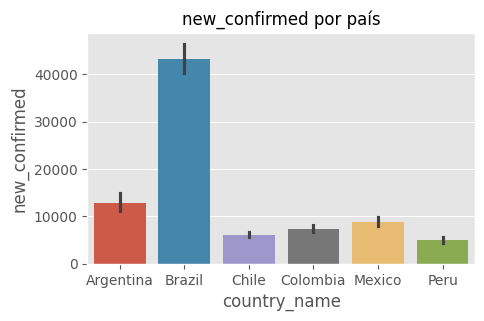

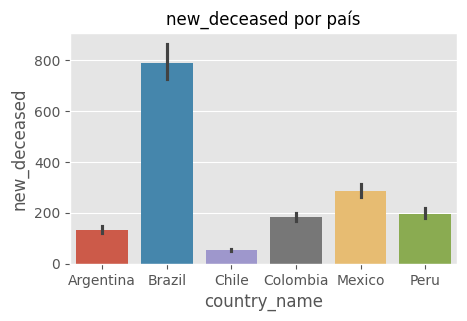

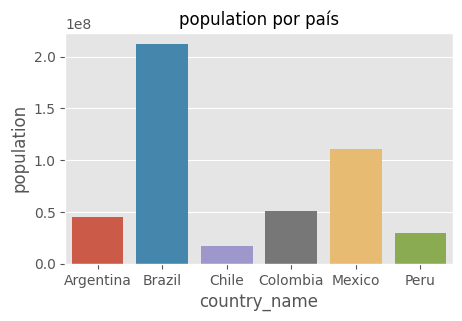

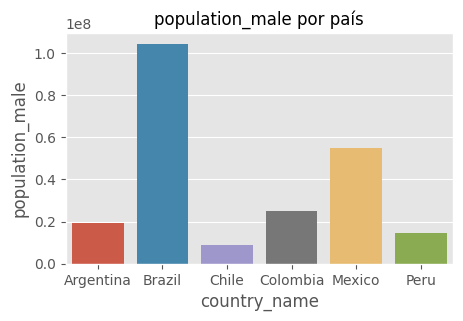

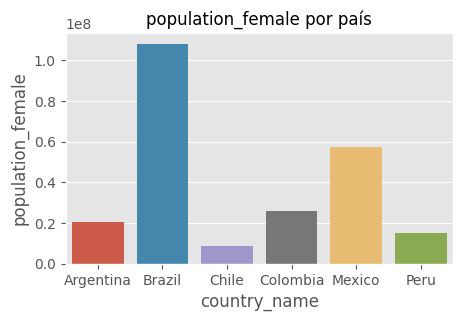

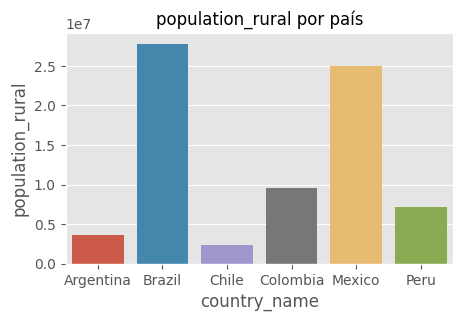

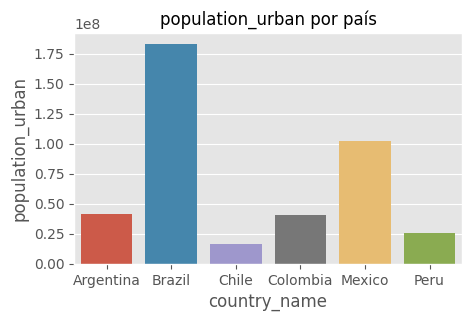

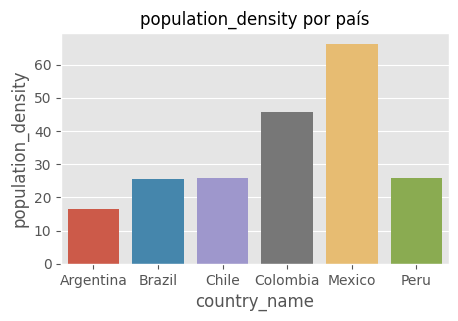

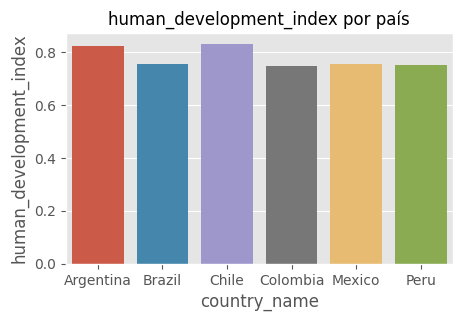

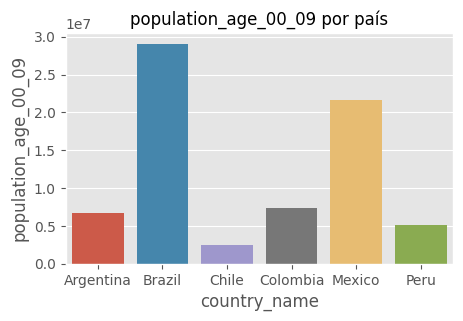

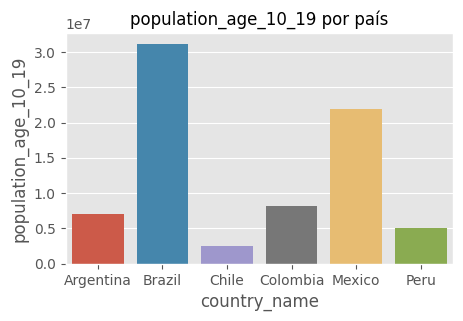

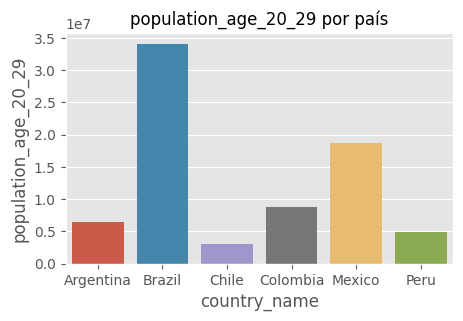

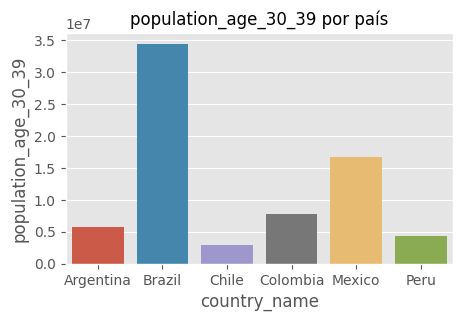

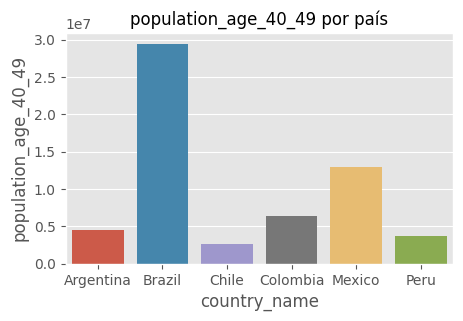

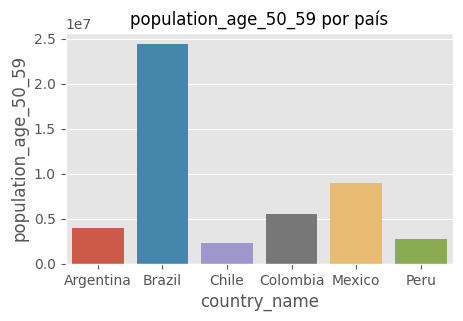

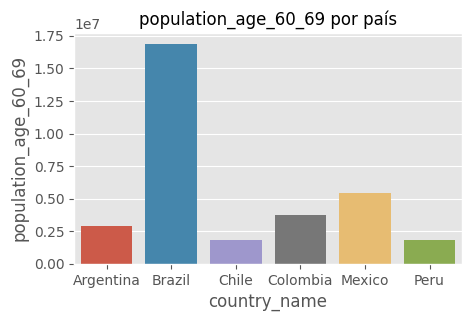

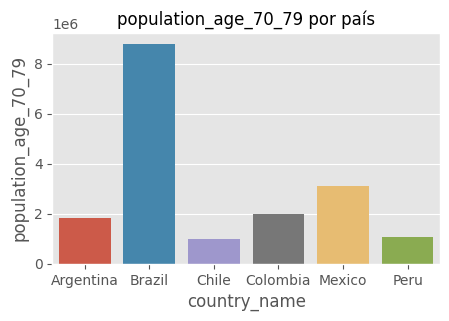

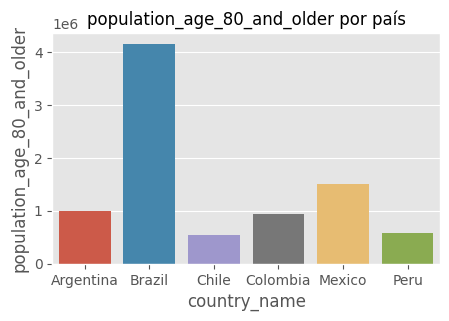

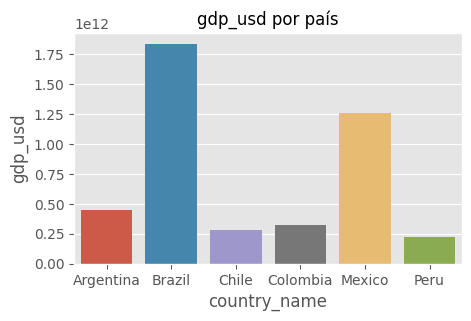

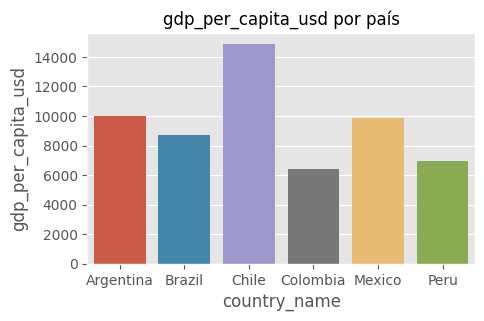

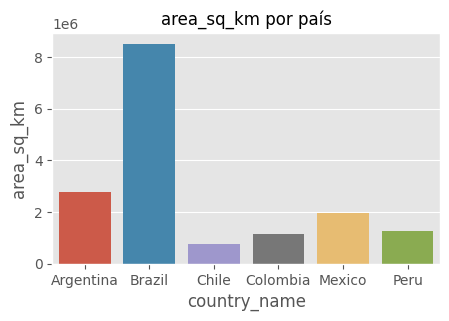

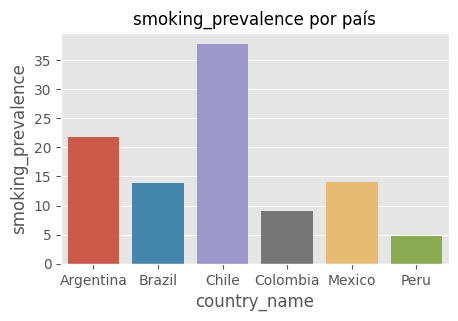

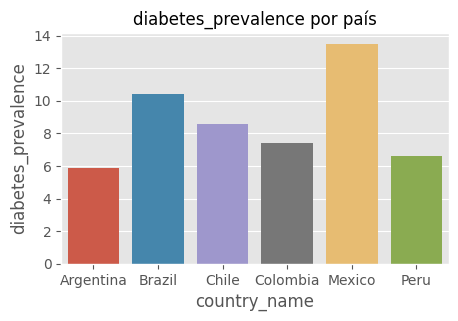

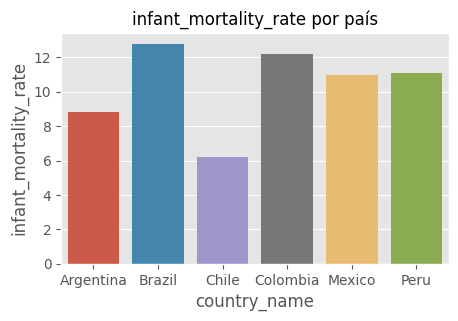

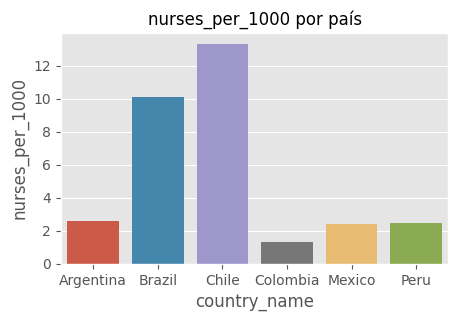

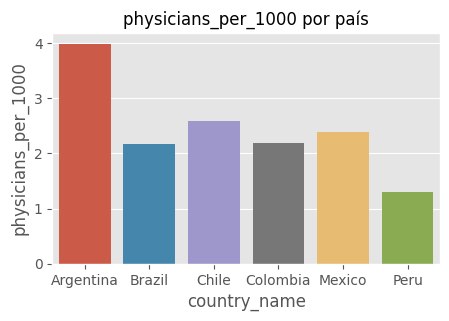

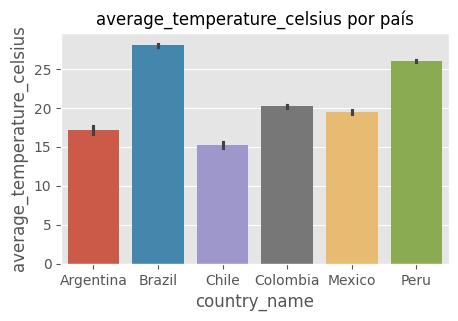

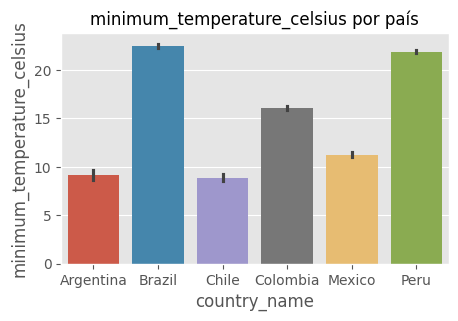

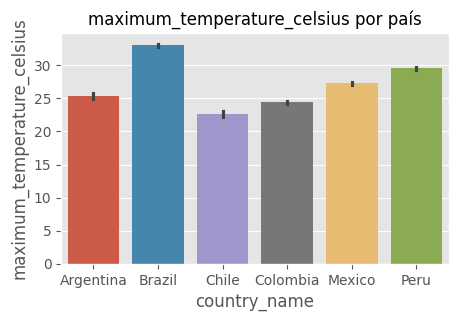

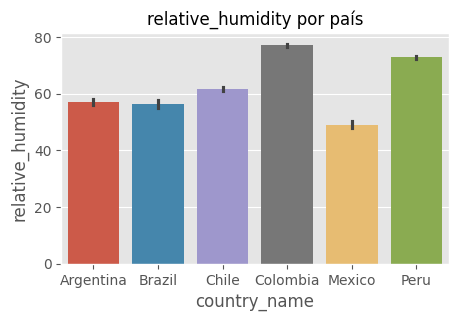

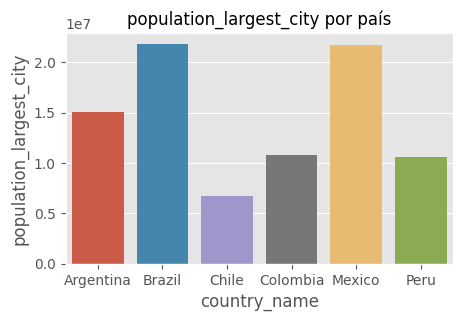

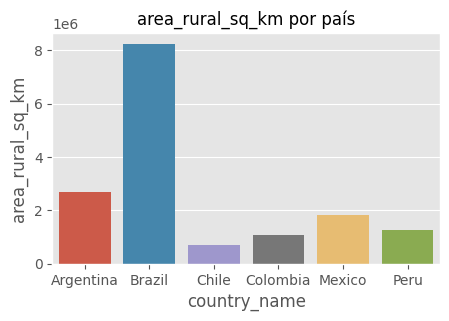

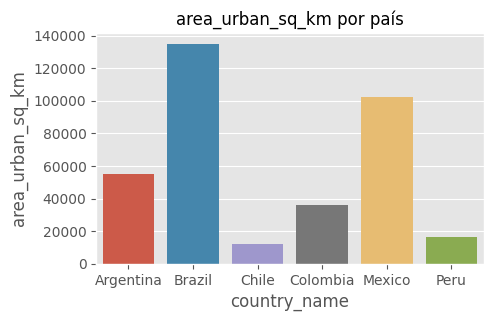

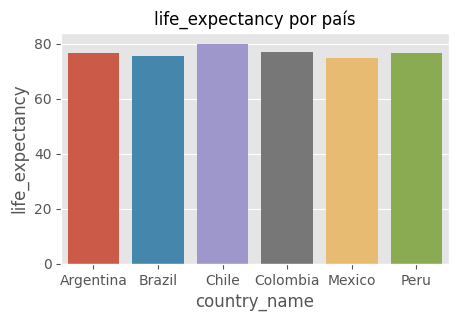

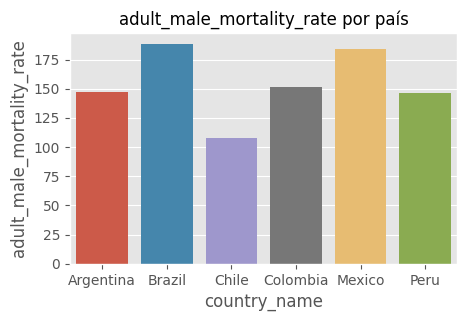

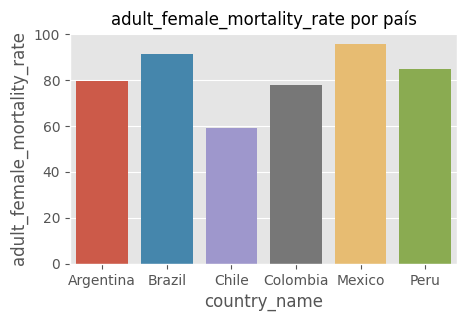

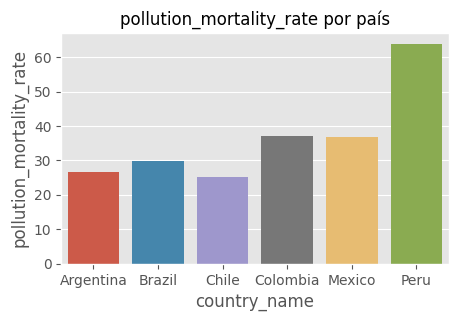

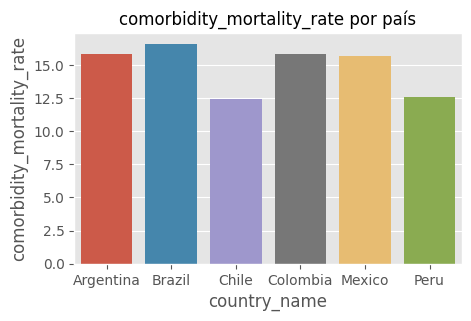

In [8]:
# Diagrama de barras para cada país en data_latinoamerica_paises con 6 columnas

# Iteramos sobre cada columna en el DataFrame data_latinoamerica_paises
for i in data_latinoamerica_nuevo.columns:
    
    # Excluimos ciertas columnas que no tienen sentido graficar en un barplot
    if i not in ['location_key', 'date', 'country_code', 'country_name', 'latitude', 'longitude', 
                 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered', 
                 'cumulative_vaccine_doses_administered', 'new_recovered']:
        
        # Configuramos la figura y los ejes para el gráfico de barras
        fig, ax = plt.subplots(figsize=(5, 3))
        
        # Creamos un gráfico de barras (barplot) utilizando seaborn
        sns.barplot(x='country_name', y=i, data=data_latinoamerica_nuevo, ax=ax, hue='country_name')
        
        # Añadimos un título al gráfico
        plt.title(f'{i} por país', fontsize=12)
        
        # Mostramos el gráfico
plt.show()

##### • Matriz de correlación, trata de crear una submascara para solo tomar una parte del gráfico y filtrar por los valores mayores a 0.5.

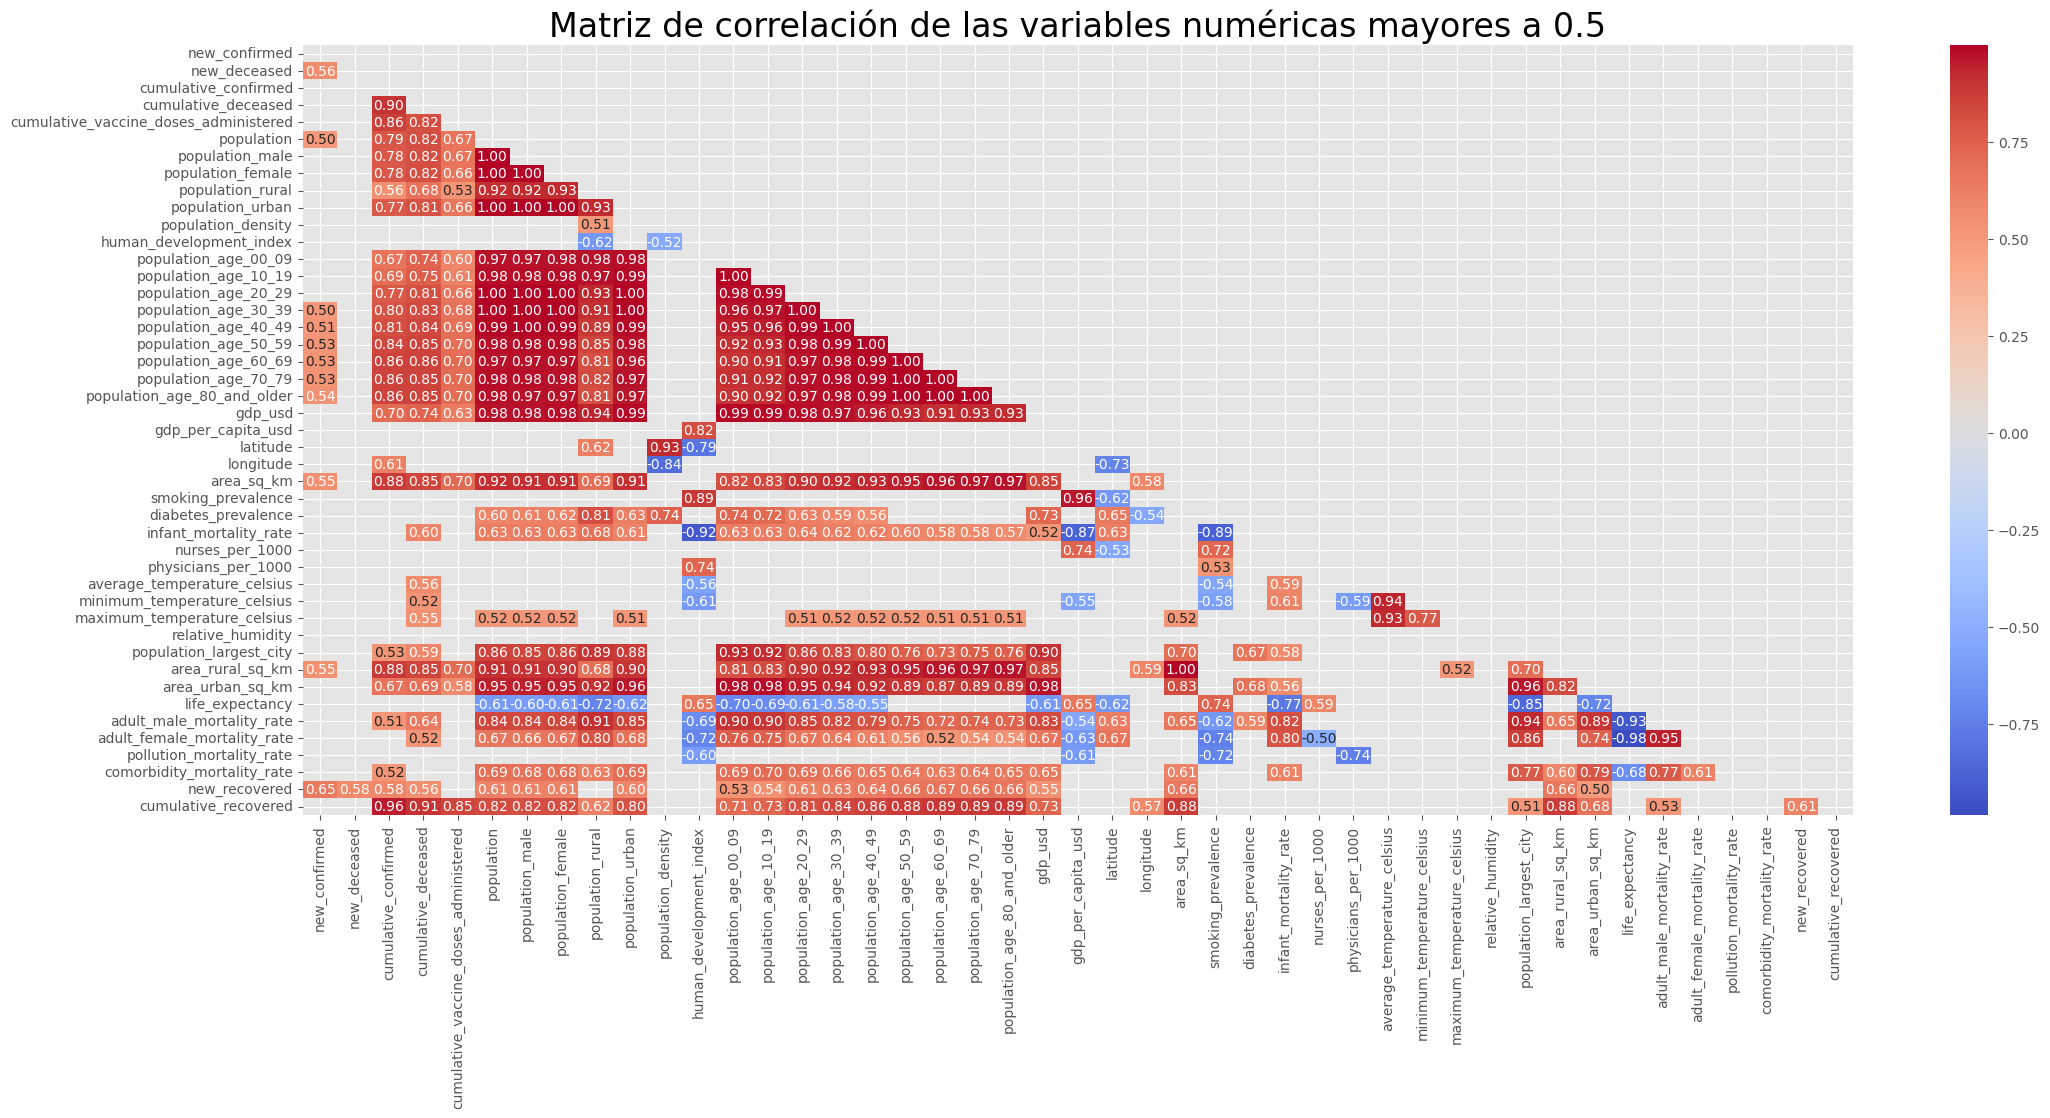

In [9]:
#Se crea la matriz de la correlación de las variables numericas
numeric_columns = data_latinoamerica_nuevo.select_dtypes(include=['float64','int64']).columns
correlation_matrix = data_latinoamerica_nuevo[numeric_columns].corr()
#Aqui se crea mascara para el triangulo superior
mask=np.triu(np.ones_like(correlation_matrix, dtype=bool))
#Vamos a mostrar valores superiores a 0.5 es decir donde hay una correlacion fuerte, sin embargo tambien se puede mostrar valores negativos.
correlation_matrix = correlation_matrix[abs(correlation_matrix)>abs(0.5)]

#Se crea la gráfica
plt.figure(figsize=(25,10))
 
heatmap = sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación de las variables numéricas mayores a 0.5', color='black', fontsize=24)
plt.show()

##### •  Histogramas de las variables que “Sí” tenga cambios de valores

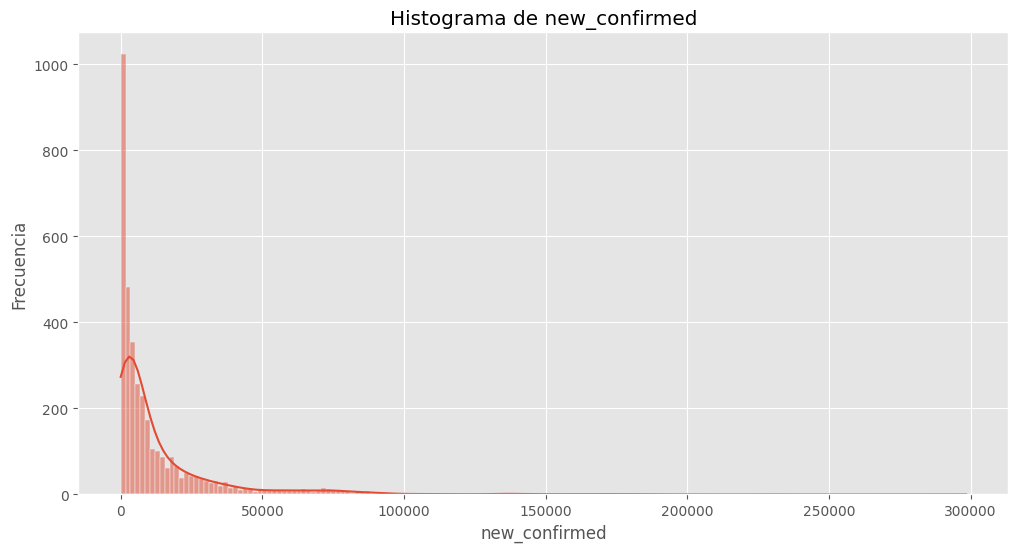

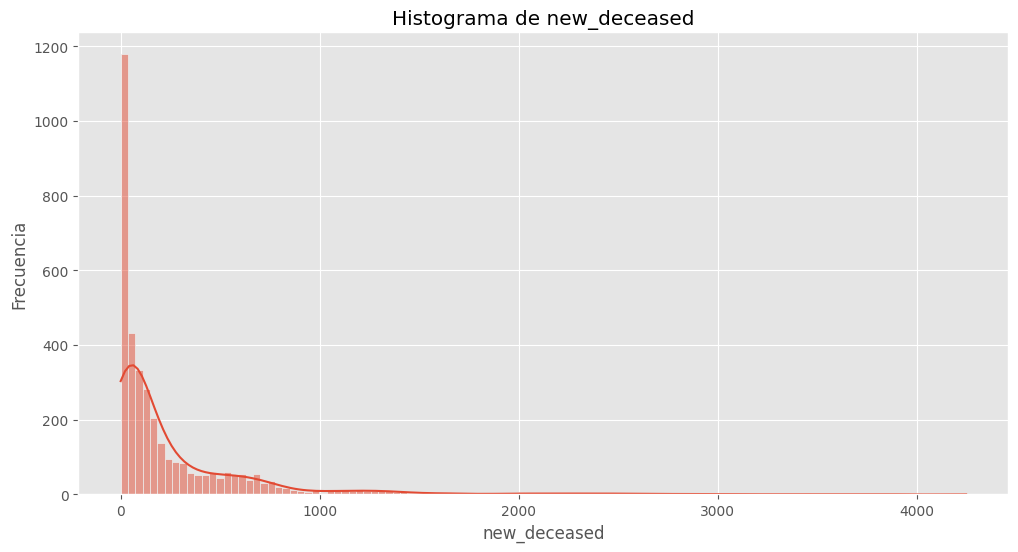

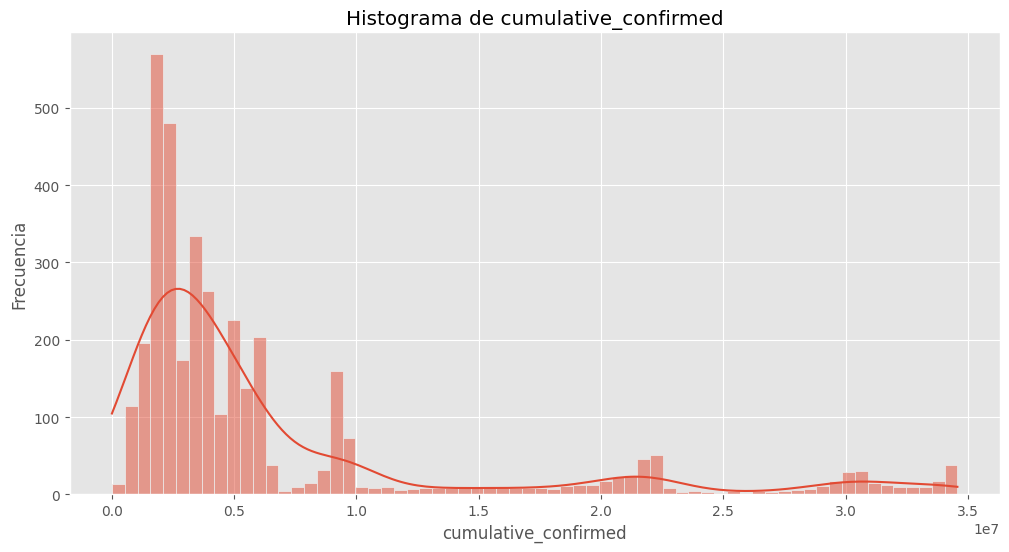

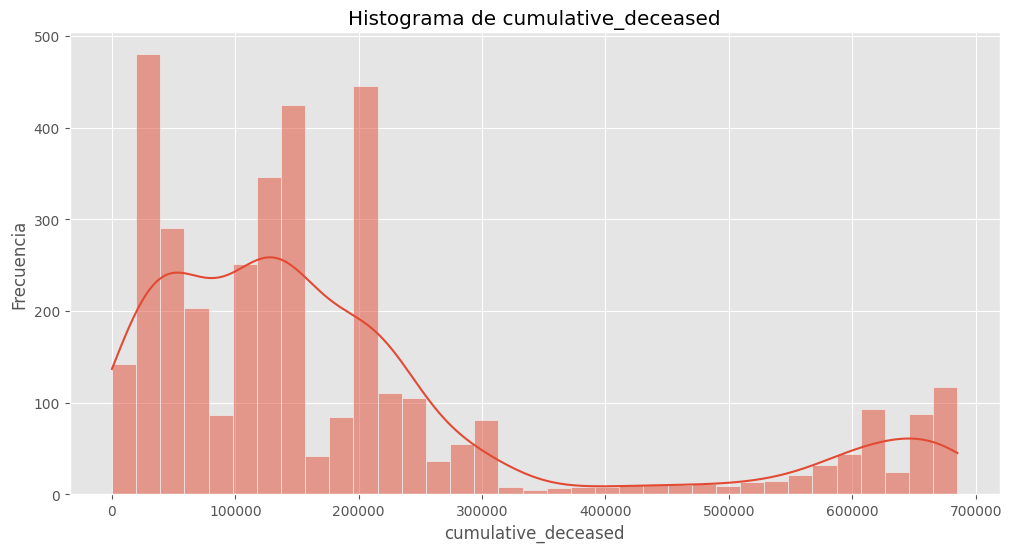

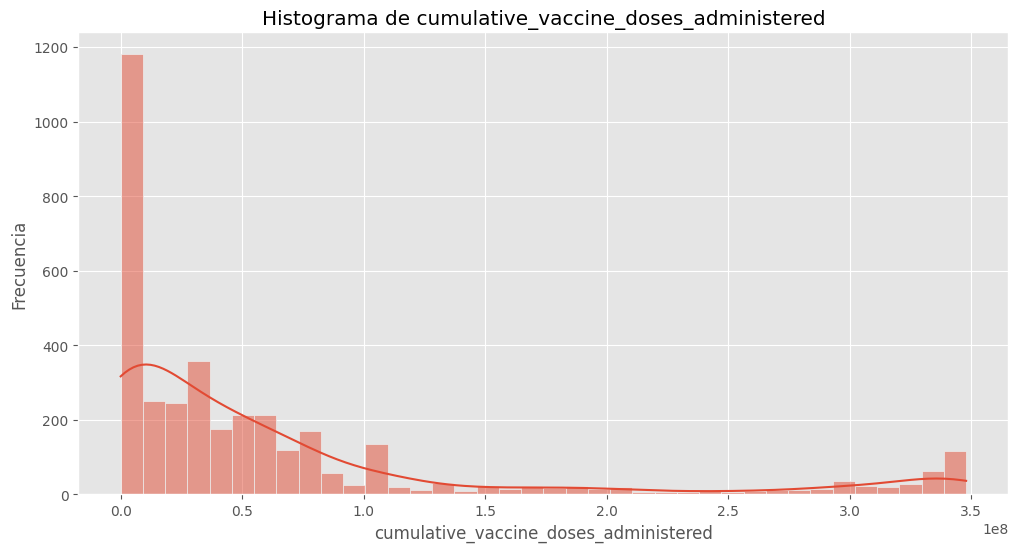

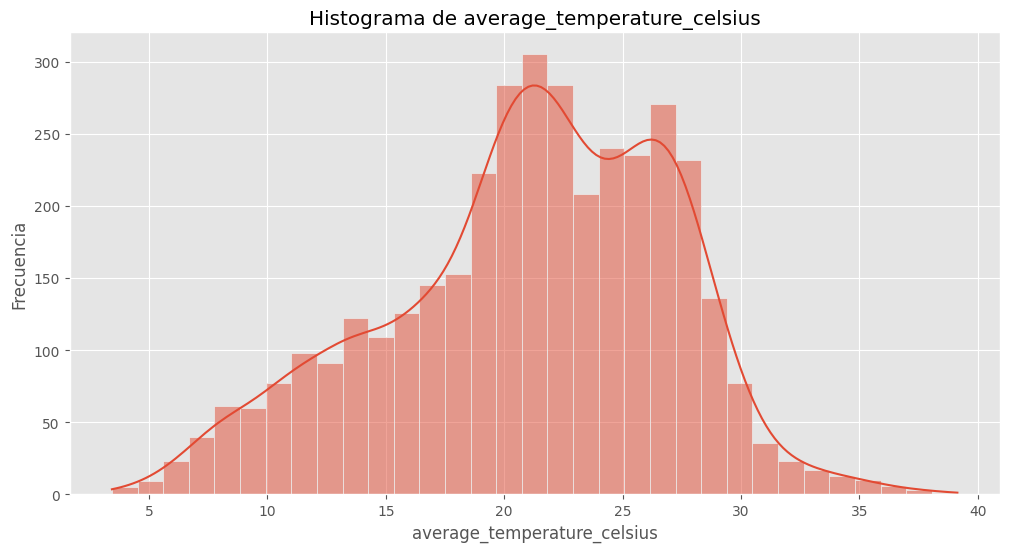

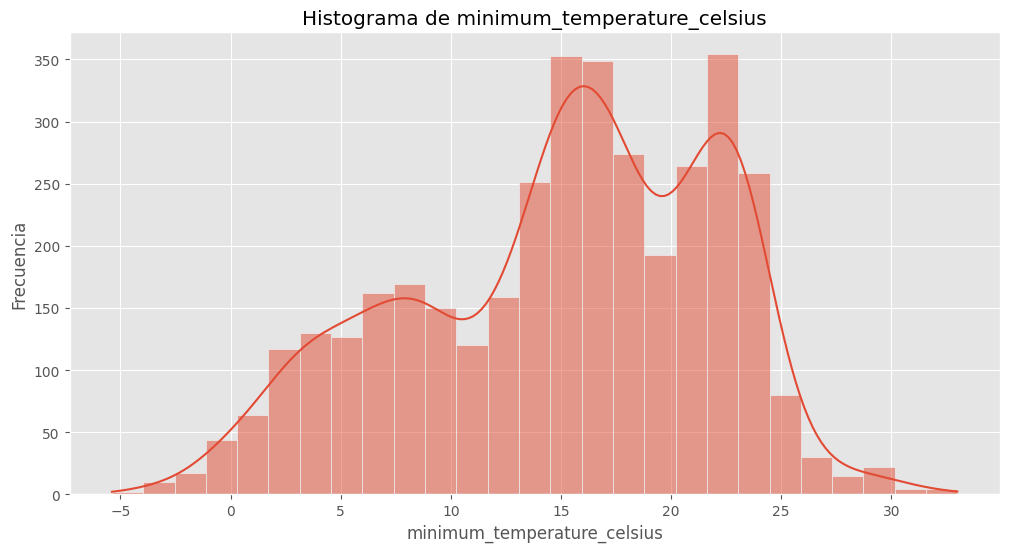

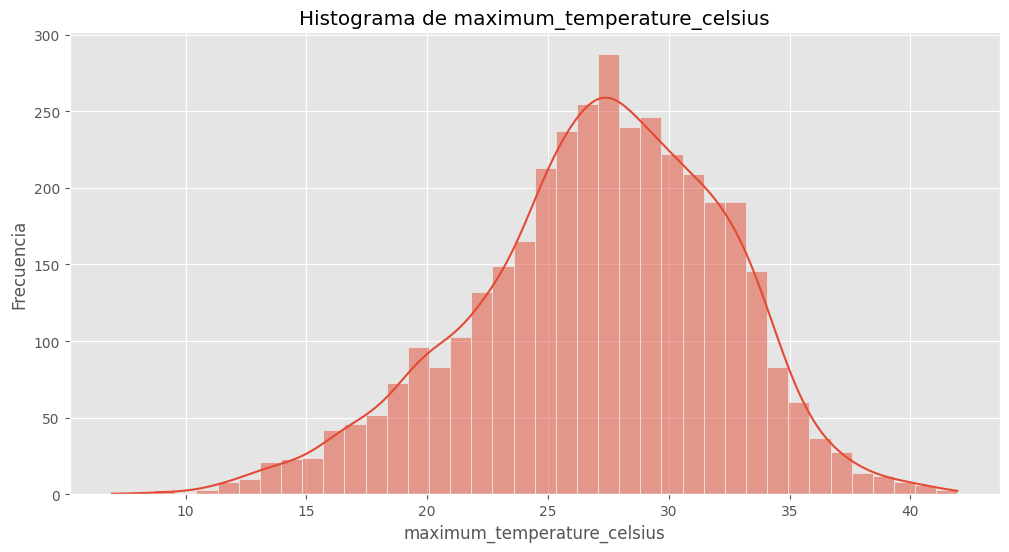

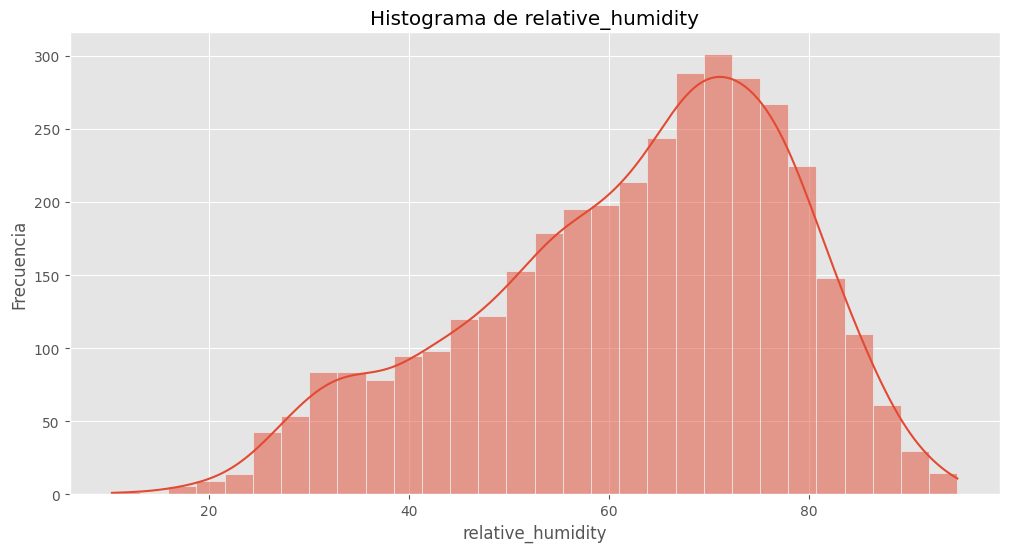

In [10]:
# Crear una variable, que contenga las columnas que tengan variables con cambios de valores

variables_con_cambios = ['new_confirmed', 'new_deceased', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_vaccine_doses_administered', 'average_temperature_celsius', 'minimum_temperature_celsius', 'maximum_temperature_celsius', 'relative_humidity']

for columna in variables_con_cambios:                                   # el ciclo for itera sobre cada columna
    fig, ax = plt.subplots(figsize=(12, 6))                              # crear figura y ejes
    sns.histplot(data_latinoamerica_nuevo[columna], kde=True)           # crear un histograma con cada una de las columnas, y añadir una estimación de densidad kernel: (curva suave que representa la distribución de los datos)

    plt.title(f'Histograma de {columna}', color='black')                # selecciona que el titulo del grafico sera el nombre de cada columna
    plt.ylabel('Frecuencia')    
    plt.show()                                                          # imprimir cada gráfico

##### • Diagrama de dispersión de la temperatura media contra los casos confirmados.

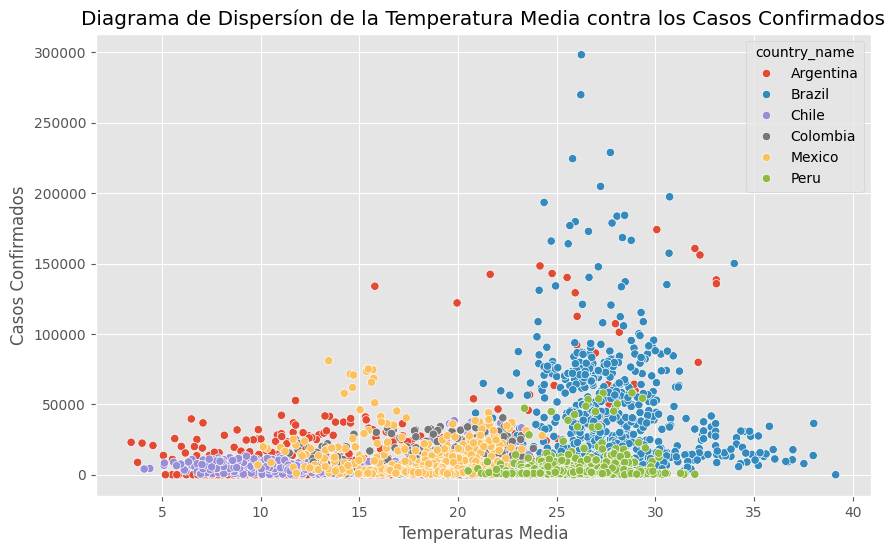

In [11]:
#crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))  

#crear grafico de dispersion
sns.scatterplot(x='average_temperature_celsius', y='new_confirmed', data=data_latinoamerica_nuevo, hue='country_name', color='black') 

# selecciona que el titulo del grafico sera el nombre de cada columna
plt.title('Diagrama de Dispersíon de la Temperatura Media contra los Casos Confirmados', color='black')   
plt.xlabel('Temperaturas Media') # titulo eje x
plt.ylabel('Casos Confirmados') # titulo eje y

# imprimir el grafico
plt.show()                                               

##### • Diagrama de dispersión de la temperatura media contra las muertes confirmadas.

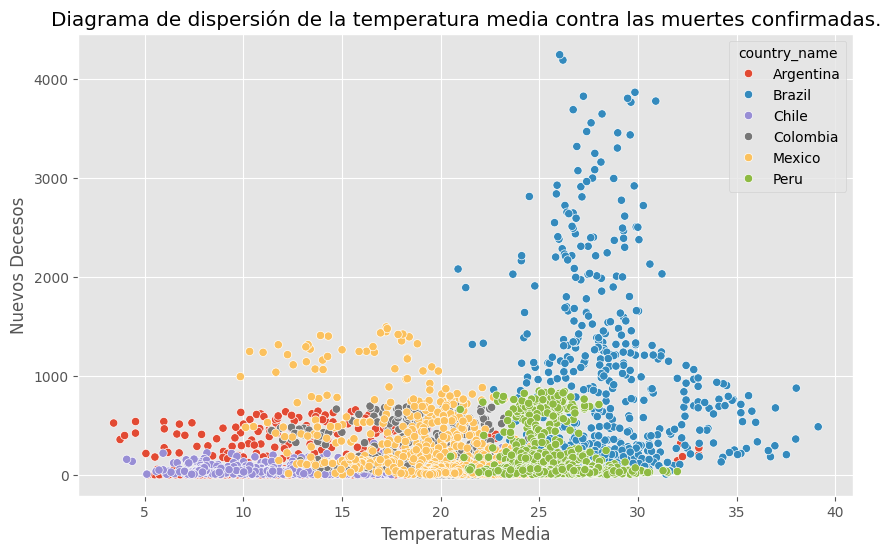

In [12]:
#crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))  

#crear grafico de dispersion
sns.scatterplot(x='average_temperature_celsius', y='new_deceased', data=data_latinoamerica_nuevo, hue='country_name') 

# selecciona que el titulo del grafico sera el nombre de cada columna
plt.title('Diagrama de dispersión de la temperatura media contra las muertes confirmadas.', color='black')   
plt.xlabel('Temperaturas Media') # titulo eje x
plt.ylabel('Nuevos Decesos') # titulo eje y

# imprimir el grafico
plt.show()   

##### • Comportamiento de las dosis administradas de todos los países (Valor medio).
###### Opcional

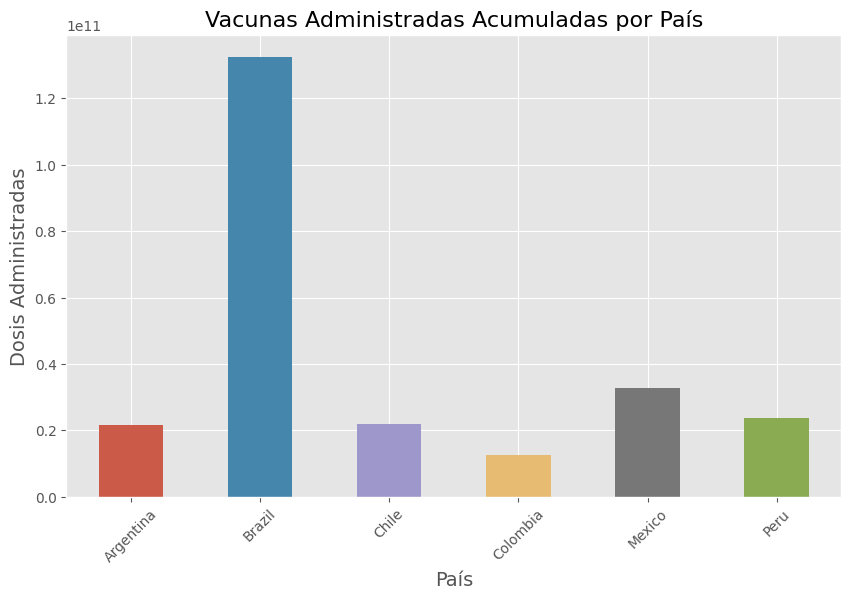

In [13]:
# Agrupar por país y sumar las dosis administradas
dosis_por_pais = data_latinoamerica_nuevo.groupby('country_name')['cumulative_vaccine_doses_administered'].sum()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
dosis_por_pais.plot(kind='bar', color=['#CC5A49', '#4586AC', '#9E97CC', '#E7BC72', '#777777', '#8AAB51'])


# Configurar los títulos y etiquetas
plt.title('Vacunas Administradas Acumuladas por País', fontsize=16, color='black')
plt.xlabel('País', fontsize=14)
plt.ylabel('Dosis Administradas', fontsize=14)
plt.xticks(rotation=45)


# Mostrar la gráfica
plt.show()

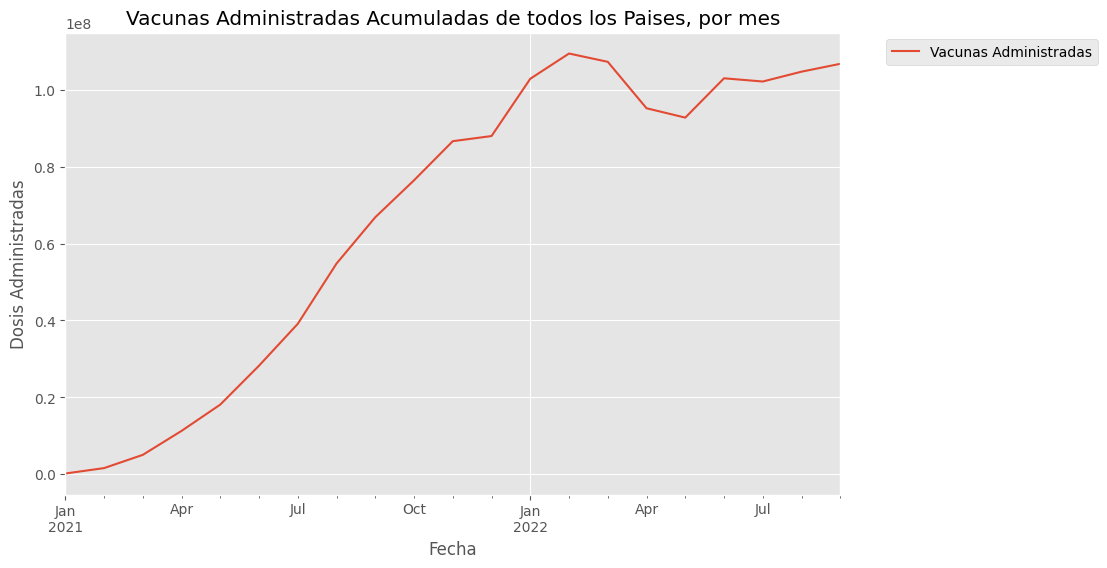

In [14]:
# Crea una figura y un eje para la gráfica con un tamaño específico
fig, ax = plt.subplots(figsize=(10, 6))

# Resamplea los datos a una frecuencia mensual, calcula el promedio de los valores numéricos
# y selecciona la columna 'cumulative_vaccine_doses_administered' para graficarla
data_latinoamerica_nuevo.resample('ME').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot()

# Añade una leyenda, ubicada fuera de la gráfica a la izquierda, con la etiqueta "Vacunas Administradas"
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', labels=['Vacunas Administradas'])

# Añade un título
plt.title('Vacunas Administradas Acumuladas de todos los Paises, por mes', color='black')

# Etiqueta del eje x
plt.xlabel('Fecha')

# Etiqueta del eje y
plt.ylabel('Dosis Administradas')

# Muestra la gráfica
plt.show()



##### • Evolución de dosis administradas por mes de cada país.

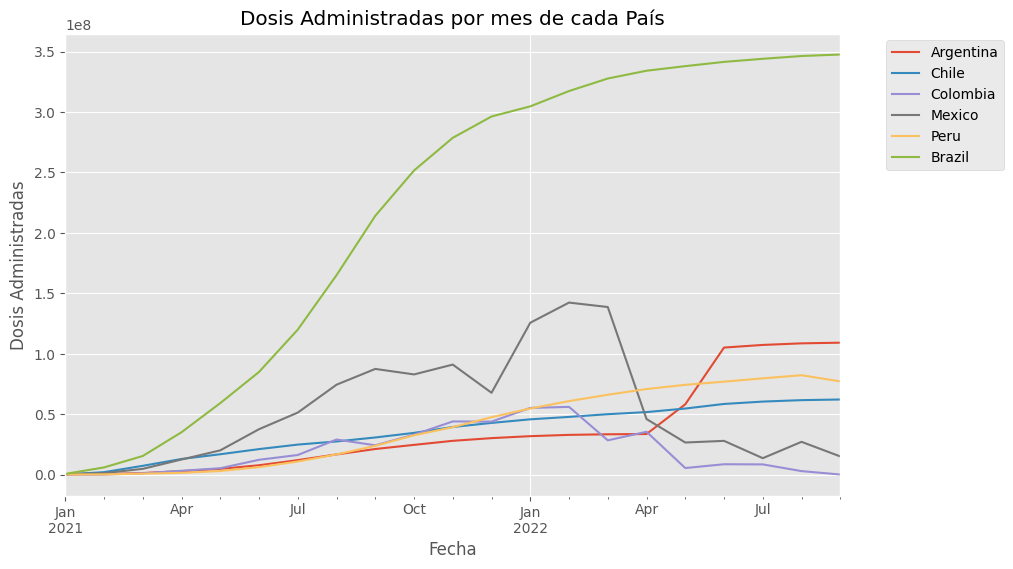

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_filtrados:
    data_latinoamerica_nuevo[data_latinoamerica_nuevo['country_name'] == pais].resample('ME').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot()

plt.title('Dosis Administradas por mes de cada País')
plt.xlabel('Fecha') # titulo eje x
plt.ylabel('Dosis Administradas') # titulo eje y

plt.legend(paises_filtrados, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

##### • Muertes por mes de cada país.

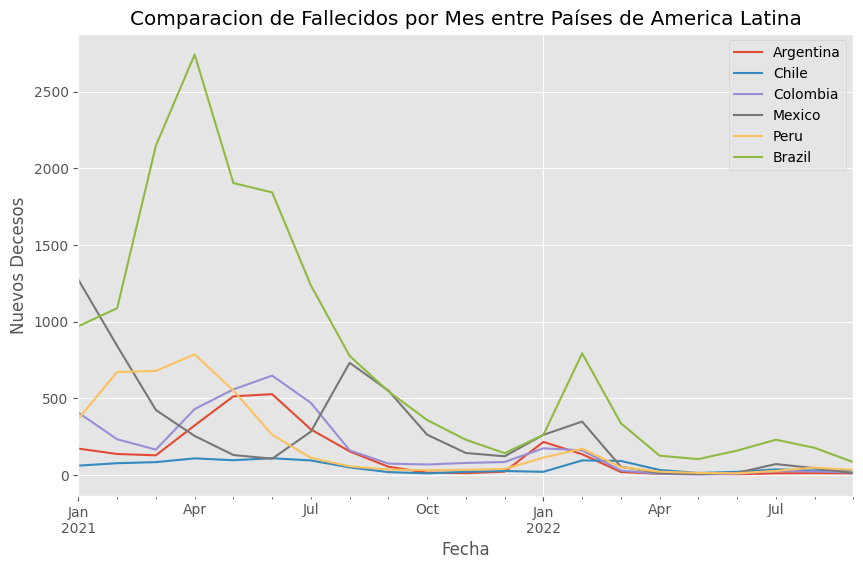

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_filtrados:
    data_latinoamerica_nuevo[data_latinoamerica_nuevo['country_name'] == pais].resample('ME').mean(numeric_only=True)['new_deceased'].plot()
plt.title('Comparacion de Fallecidos por Mes entre Países de America Latina', color='black')
plt.xlabel('Fecha') # titulo eje x
plt.ylabel('Nuevos Decesos') # titulo eje y
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_filtrados)
plt.show()

##### • Casos confirmados por mes de cada país.

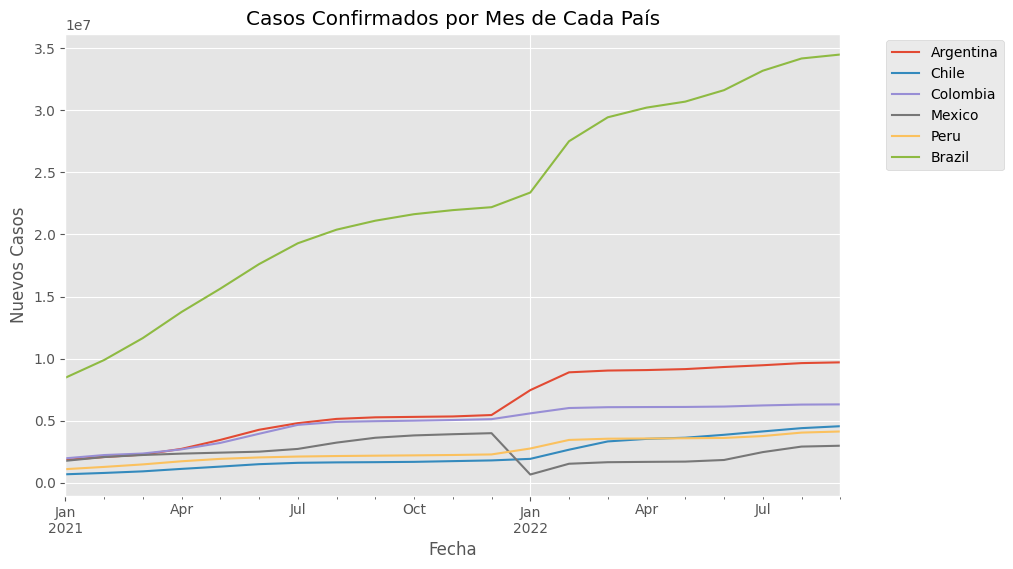

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))  

for pais in paises_filtrados:
    data_pais = data_latinoamerica_nuevo[data_latinoamerica_nuevo['country_name'] == pais]
    data_pais.resample('ME').mean(numeric_only=True)['cumulative_confirmed'].plot(ax=ax)

plt.title('Casos Confirmados por Mes de Cada País')
plt.xlabel('Fecha')
plt.ylabel('Nuevos Casos')

plt.legend(paises_filtrados, bbox_to_anchor=(1.05, 1), loc='upper left')  # Ajustar la leyenda
plt.show()


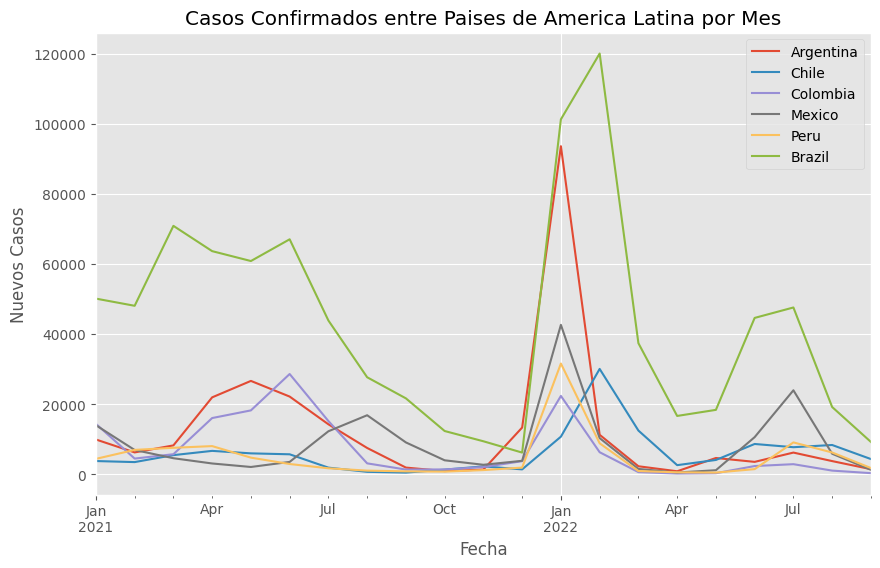

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_filtrados:
    data_latinoamerica_nuevo[data_latinoamerica_nuevo['country_name'] == pais].resample('ME').mean(numeric_only=True)['new_confirmed'].plot()
plt.title('Casos Confirmados entre Paises de America Latina por Mes')
plt.xlabel('Fecha') # titulo eje x
plt.ylabel('Nuevos Casos') # titulo eje y

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_filtrados)
plt.show()

##### • Recuperaciones de casos por mes de cada país

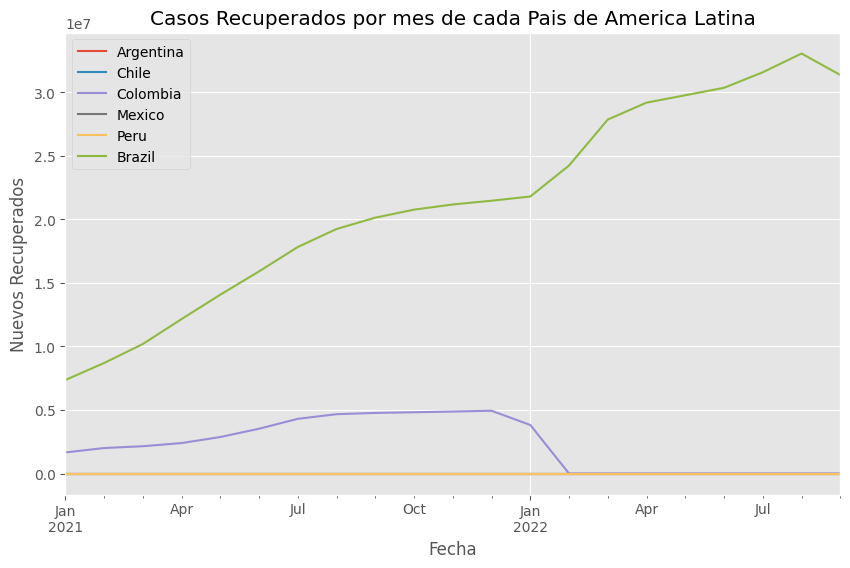

In [75]:
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_filtrados:
    data_latinoamerica_nuevo[data_latinoamerica_nuevo['country_name'] == pais].resample('ME').mean(numeric_only=True)['cumulative_recovered'].plot()
plt.title('Casos Recuperados por mes de cada Pais de America Latina')
plt.xlabel('Fecha') # titulo eje x
plt.ylabel('Nuevos Recuperados') # titulo eje y

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_filtrados)
plt.show()

 se evidenciaba una falla en los datos

##### • Comparación del Número de Casos Nuevos entre Países 

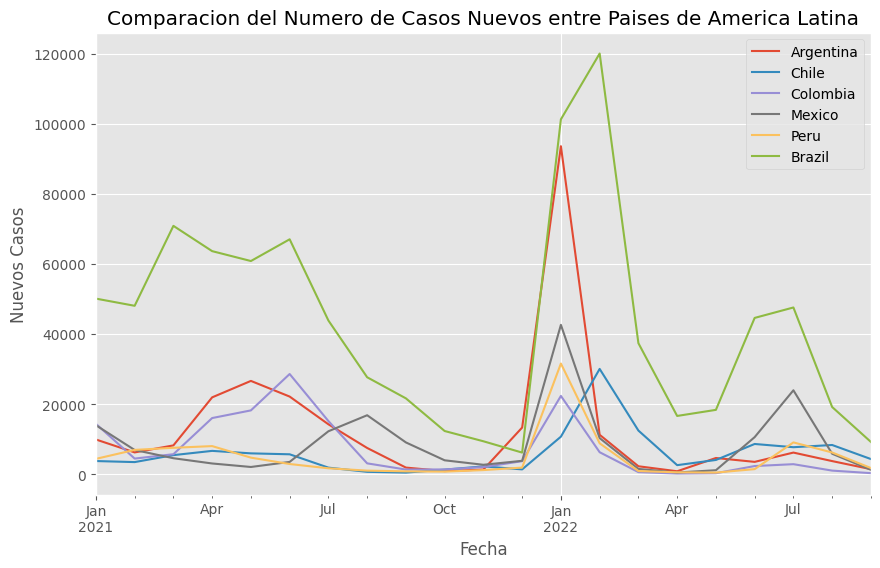

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_filtrados:
    data_latinoamerica_nuevo[data_latinoamerica_nuevo['country_name'] == pais].resample('ME').mean(numeric_only=True)['new_confirmed'].plot()
plt.title('Comparacion del Numero de Casos Nuevos entre Paises de America Latina')
plt.xlabel('Fecha') # titulo eje x
plt.ylabel('Nuevos Casos') # titulo eje y

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_filtrados)
plt.show()

poblacion argentina menor que brasil y tiene un pico de casos 

##### • Dosis acumuladas por país

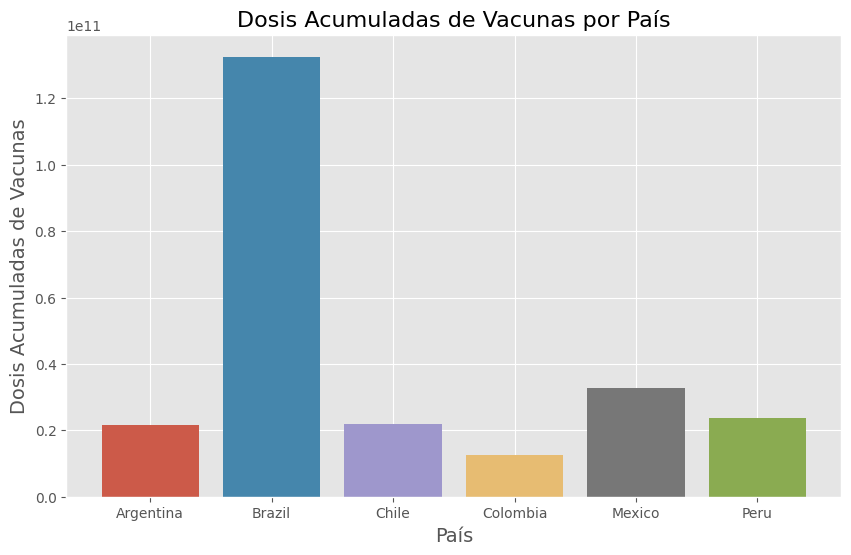

In [21]:
# Filtrar los datos para los países seleccionados
datos_filtrados = data_latinoamerica_nuevo[data_latinoamerica_nuevo['country_name'].isin(paises_filtrados)]

# Calcular la suma total de dosis acumuladas de vacunas administradas por país
dosis_acumuladas_por_pais = datos_filtrados.groupby('country_name')['cumulative_vaccine_doses_administered'].sum().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(dosis_acumuladas_por_pais['country_name'], dosis_acumuladas_por_pais['cumulative_vaccine_doses_administered'],
        color=['#CC5A49', '#4586AC', '#9E97CC', '#E7BC72', '#777777', '#8AAB51'])

# Configurar los títulos y etiquetas
plt.title('Dosis Acumuladas de Vacunas por País', fontsize=16)
plt.xlabel('País', fontsize=14)
plt.ylabel('Dosis Acumuladas de Vacunas', fontsize=14)

# Mostrar el gráfico
plt.show()

##### • Boxplot de temperatura media de cada país.

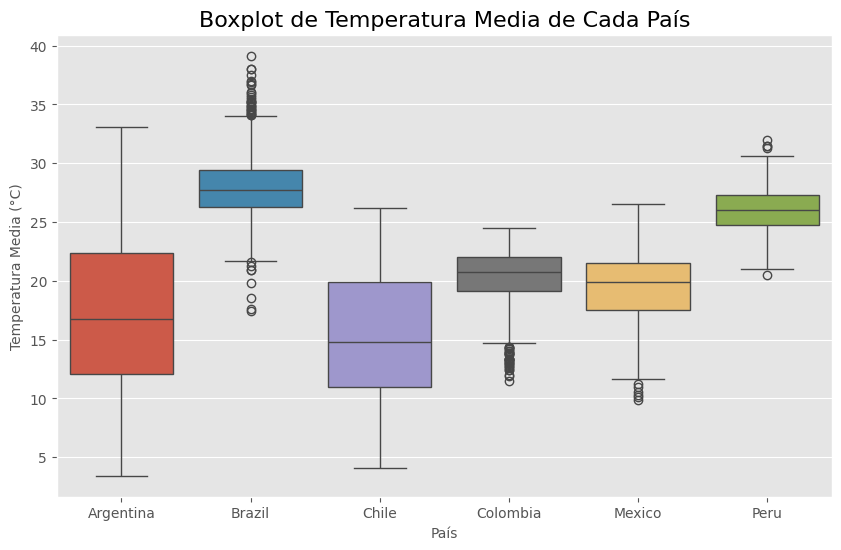

In [22]:
# Filtrar los datos para los países seleccionados
datos_filtrados = data_latinoamerica_nuevo[data_latinoamerica_nuevo['country_name'].isin(paises_filtrados)]

# Paleta de colores personalizada
palette = "Set1"  # Por ejemplo, puedes utilizar la paleta 'Set1'

# Colores personalizados
colores = sns.color_palette(palette, len(paises_filtrados))

# Crear el gráfico de caja (boxplot) usando Seaborn y especificar los colores
plt.figure(figsize=(10, 6))
sns.boxplot(x='country_name', y='average_temperature_celsius', data=datos_filtrados, hue='country_name')

# Configurar los títulos y etiquetas
plt.title('Boxplot de Temperatura Media de Cada País', fontsize=16)
plt.xlabel('País', fontsize=10)
plt.ylabel('Temperatura Media (°C)', fontsize=10)

# Mostrar el gráfico
plt.show()

##### • Violinplot de las variables que “Sí” tenga cambios de valores.

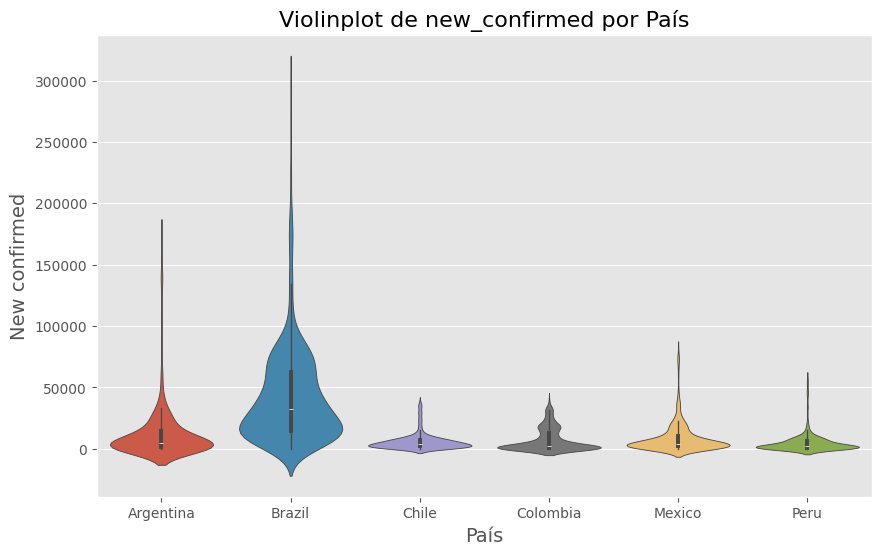

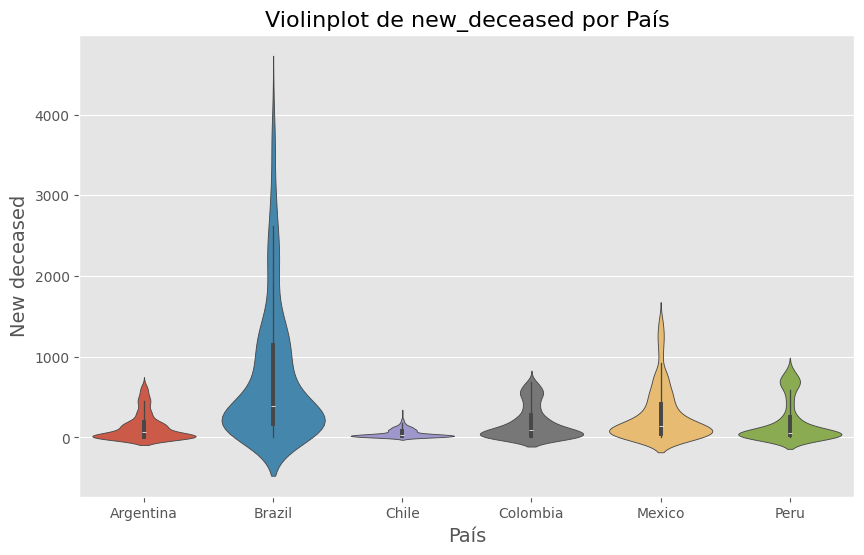

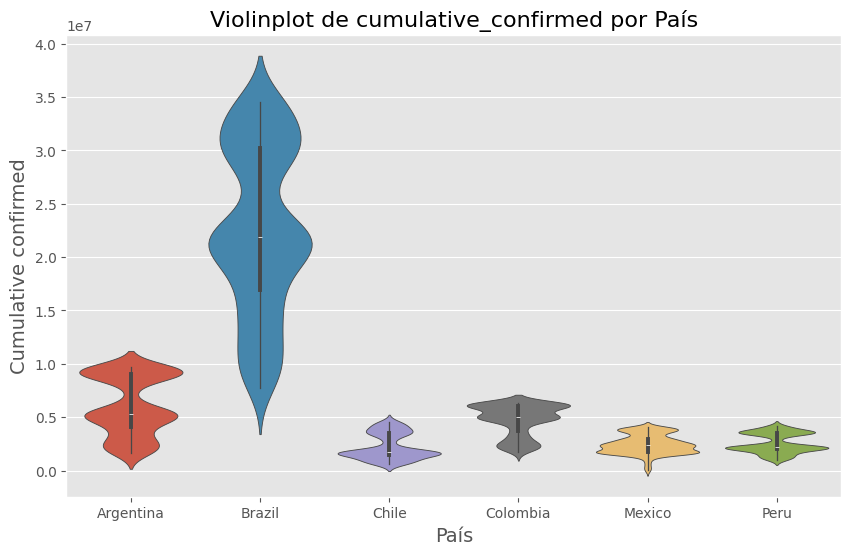

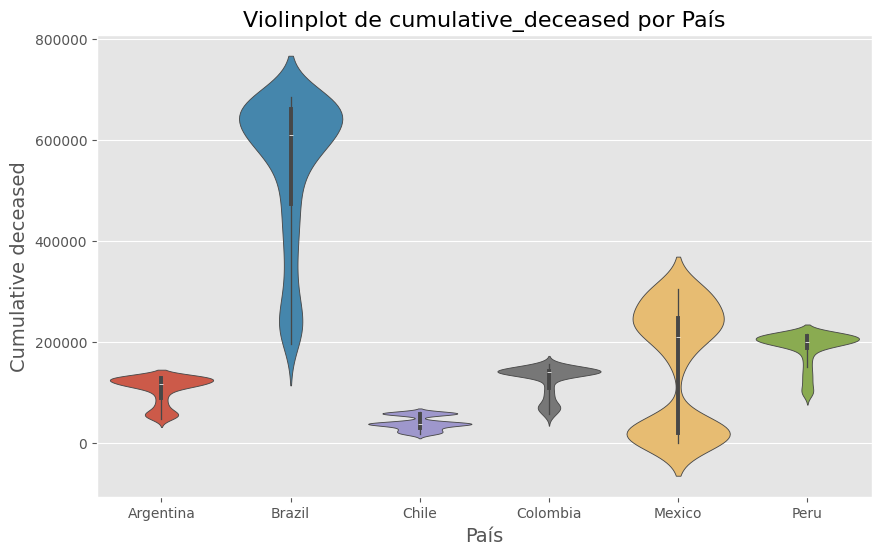

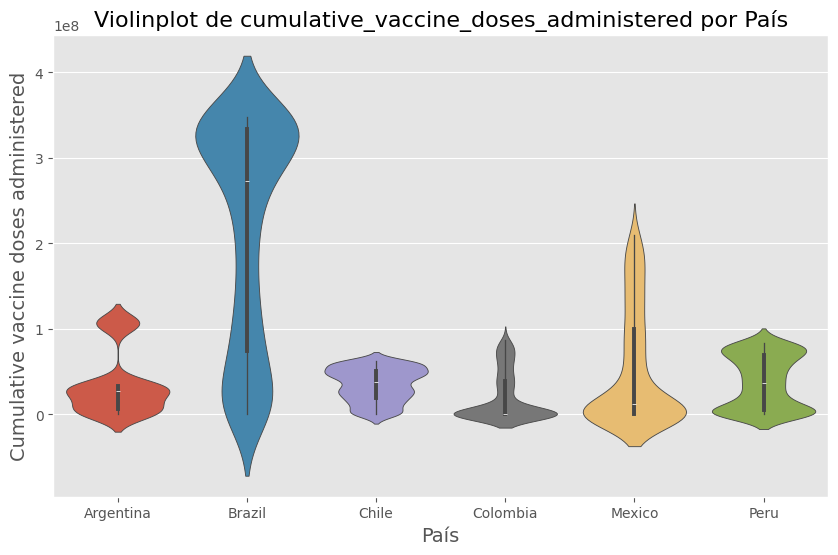

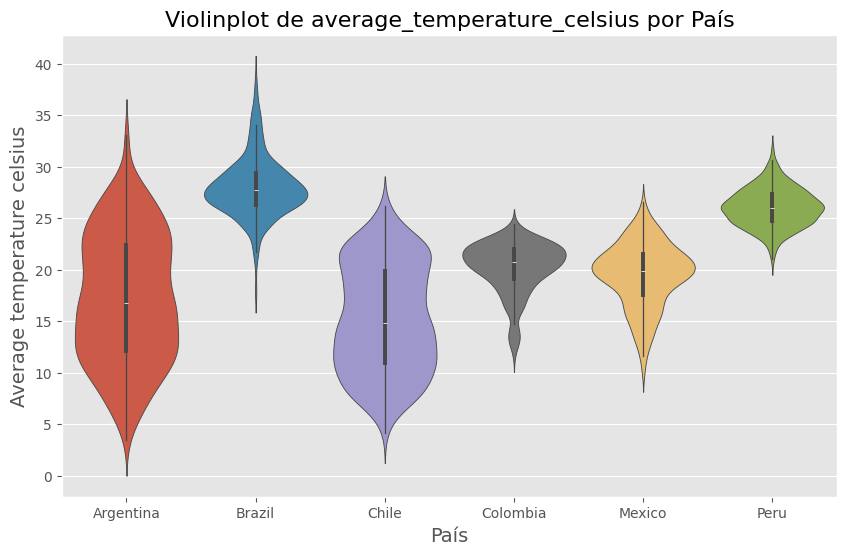

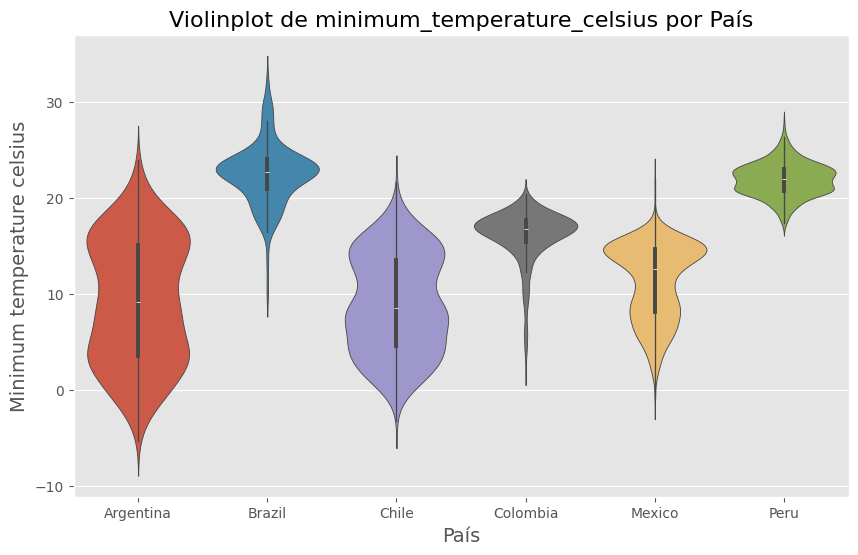

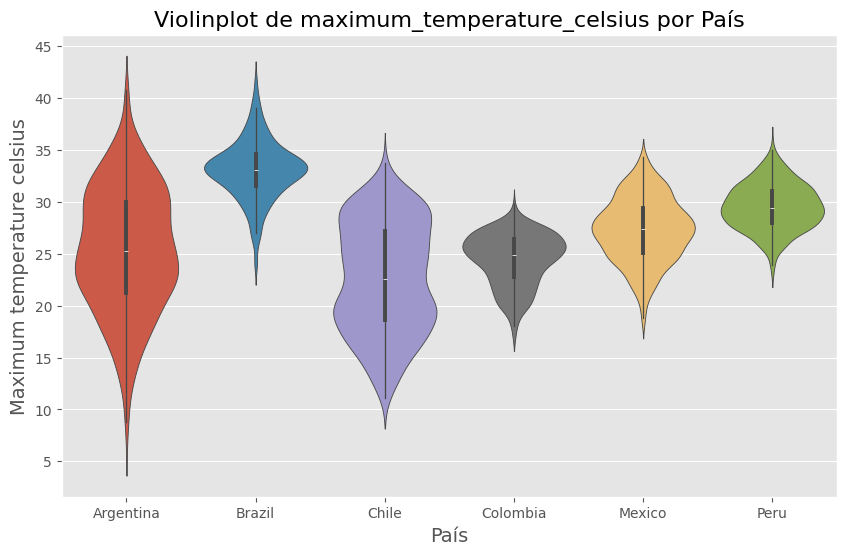

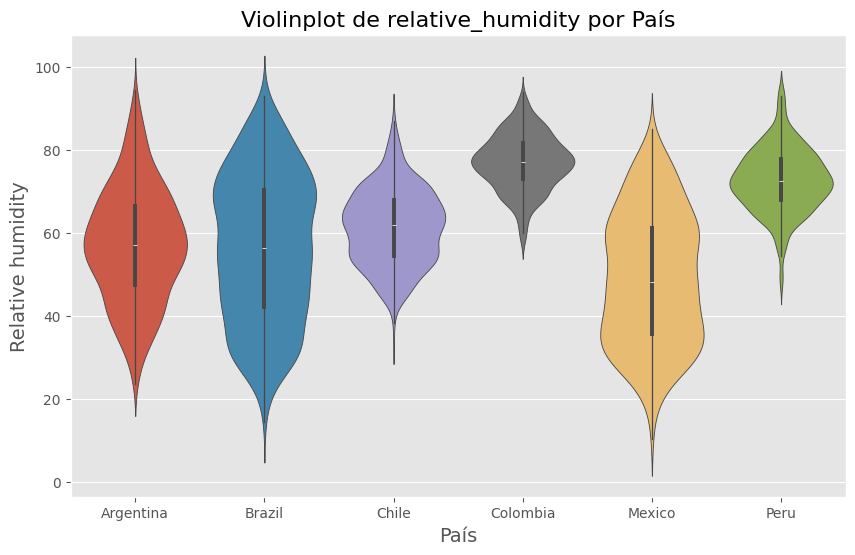

In [23]:
# Filtrar los datos para los países seleccionados
datos_filtrados = data_latinoamerica_nuevo[data_latinoamerica_nuevo['country_name'].isin(paises_filtrados)]

# Variables con cambios de valores
variables_con_cambios = ['new_confirmed', 'new_deceased', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_vaccine_doses_administered', 'average_temperature_celsius', 'minimum_temperature_celsius', 'maximum_temperature_celsius', 'relative_humidity']

# Crear gráficos de violín para cada variable con cambios de valores
for variable in variables_con_cambios:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='country_name', y=variable, hue='country_name', data=datos_filtrados, legend=False)  # Asignar x a hue
    
    # Configurar los títulos y etiquetas
    plt.title(f'Violinplot de {variable} por País', fontsize=16)
    plt.xlabel('País', fontsize=14)
    plt.ylabel(variable.replace('_', ' ').capitalize(), fontsize=14)
    
    # Mostrar el gráfico
    plt.show()

##### • Distribución de la población por grupos de edad

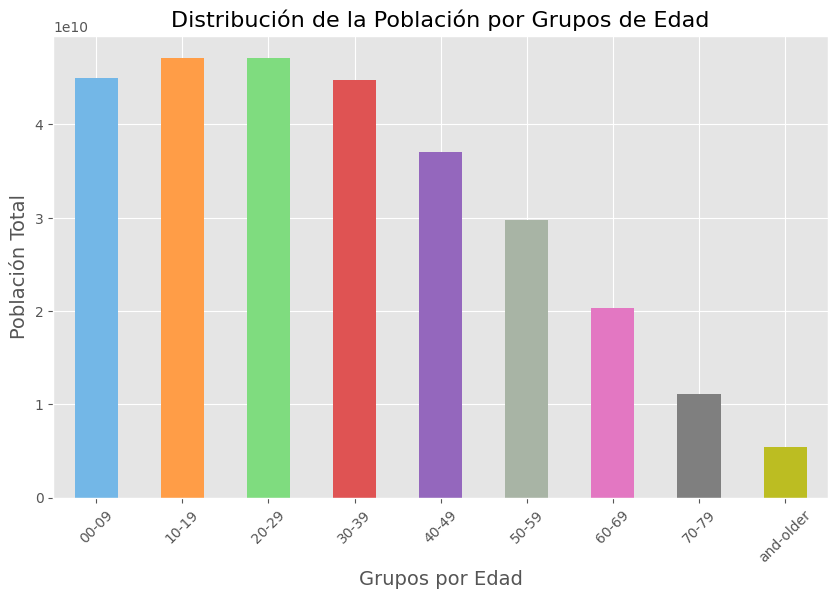

In [24]:
# Definir los grupos de edad
grupos_edad = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39',
               'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79',
               'population_age_80_and_older']

# Sumar la población en cada grupo de edad para todos los países
poblacion_por_edad = data_latinoamerica_nuevo[grupos_edad].sum()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
poblacion_por_edad.plot(kind='bar', color=['#73B7E7', '#FF9D47', '#7FDC7F', '#DF5353', '#9467bd', '#A8B4A5', '#e377c2', '#7f7f7f', '#bcbd22'])

# Configurar los títulos y etiquetas
plt.title('Distribución de la Población por Grupos de Edad', fontsize=16)
plt.xlabel('Grupos por Edad', fontsize=14)
plt.ylabel('Población Total', fontsize=14)

# Añadir etiquetas personalizadas para los grupos de edad
plt.xticks(range(len(grupos_edad)), [col.split('_')[-2] + '-' + col.split('_')[-1] for col in grupos_edad], rotation=45)

# Mostrar el gráfico
plt.show()

##### • Mapa de calor de Métricas por país.

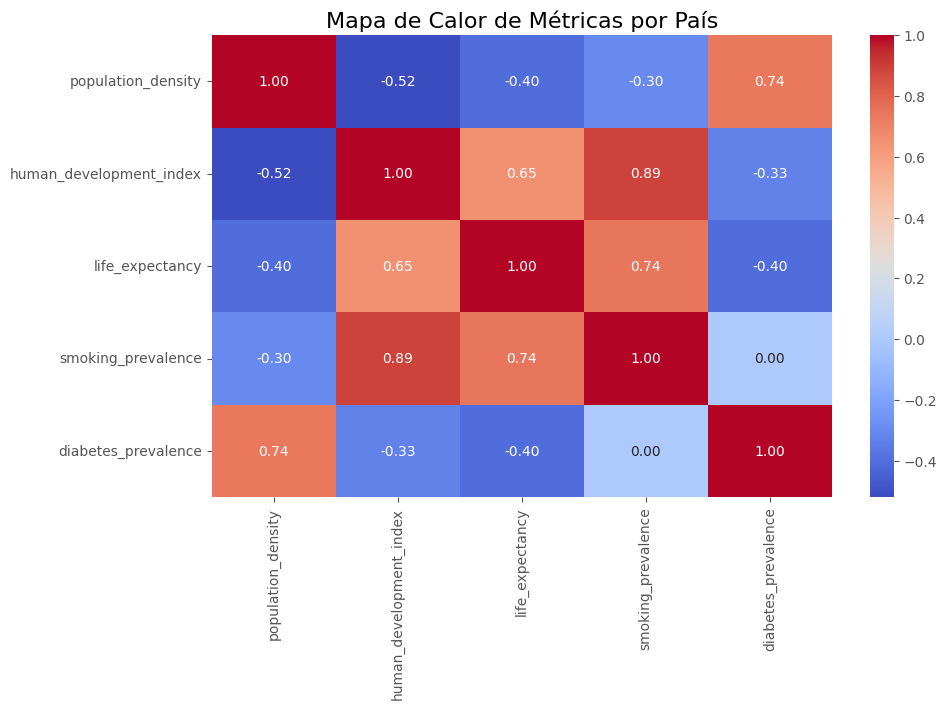

In [25]:
# Seleccionar las métricas a incluir en el mapa de calor
metricas = ['population_density', 'human_development_index', 'life_expectancy', 'smoking_prevalence', 'diabetes_prevalence']

# Filtrar los datos para los países seleccionados
datos_filtrados = data_latinoamerica_nuevo[data_latinoamerica_nuevo['country_name'].isin(paises_filtrados)]

# Calcular la matriz de correlación entre las métricas seleccionadas
correlacion = datos_filtrados[metricas].corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})

# Configurar el título
plt.title('Mapa de Calor de Métricas por País', fontsize=16)

# Mostrar el mapa de calor
plt.show()

##### • Diagrama de barras apilado de comparación de la tasa de mortalidad masculina vs. femenina por país

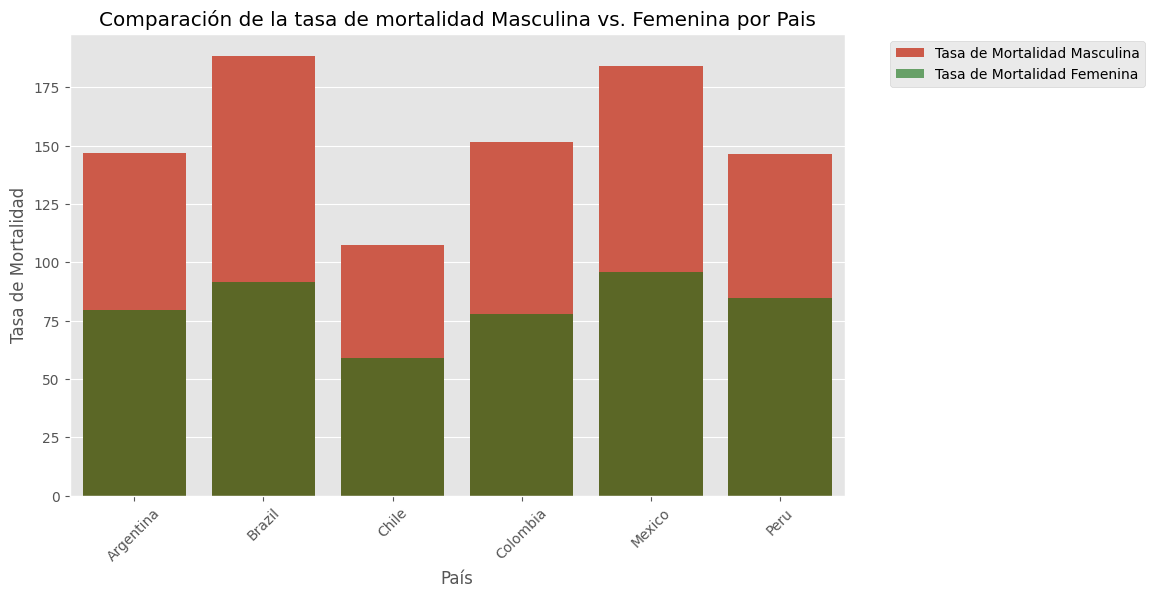

In [26]:
plt.figure(figsize=(10, 6))

sns.barplot(data=data_latinoamerica_nuevo, x='country_name', y='adult_male_mortality_rate', label='Tasa de Mortalidad Masculina')
            
sns.barplot(data=data_latinoamerica_nuevo, x='country_name', y='adult_female_mortality_rate', color='green', alpha=0.6, label='Tasa de Mortalidad Femenina')

plt.xticks(rotation=45)
plt. xlabel('País')
plt. ylabel('Tasa de Mortalidad')
plt. title('Comparación de la tasa de mortalidad Masculina vs. Femenina por Pais')

plt. legend(bbox_to_anchor=(1.05, 1), loc='upper left')


plt.show()

En este código, primero calculamos las tasas de mortalidad masculina y femenina por país. Luego, seleccionamos los países y las tasas de mortalidad correspondientes. Finalmente, creamos un gráfico de barras apilado donde cada barra representa la tasa de mortalidad masculina y femenina para un país específico, y las barras se apilan una encima de la otra. Esto nos permite comparar fácilmente las tasas de mortalidad entre hombres y mujeres para cada país.

##### • Matriz de correlación de indicadores demográficos y de salud

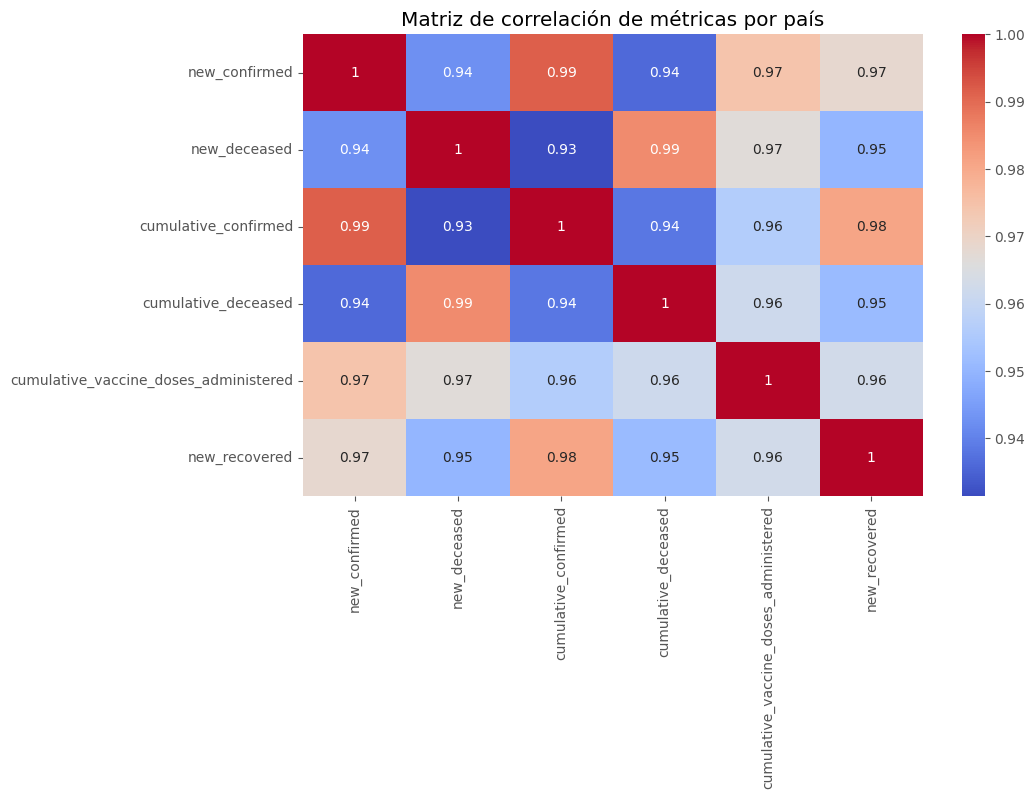

In [27]:
# Definir la lista de métricas
metricas = ['new_confirmed', 'new_deceased', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_vaccine_doses_administered', 'new_recovered']

# Agrupar los datos por país y calcular la media de las métricas
metricas_por_pais = data_latinoamerica_nuevo.groupby('country_name')[metricas].mean()

# Calcular la matriz de correlación para las métricas agrupadas
correlation_matrix = metricas_por_pais.corr()

# Configurar el tamaño de la figura para el mapa de calor
plt.figure(figsize=(10, 6))

# Crear el mapa de calor con la matriz de correlación y aplicar la máscara
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Añadir un título al gráfico
plt.title('Matriz de correlación de métricas por país')

# Mostrar el gráfico
plt.show()

##### • Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad.

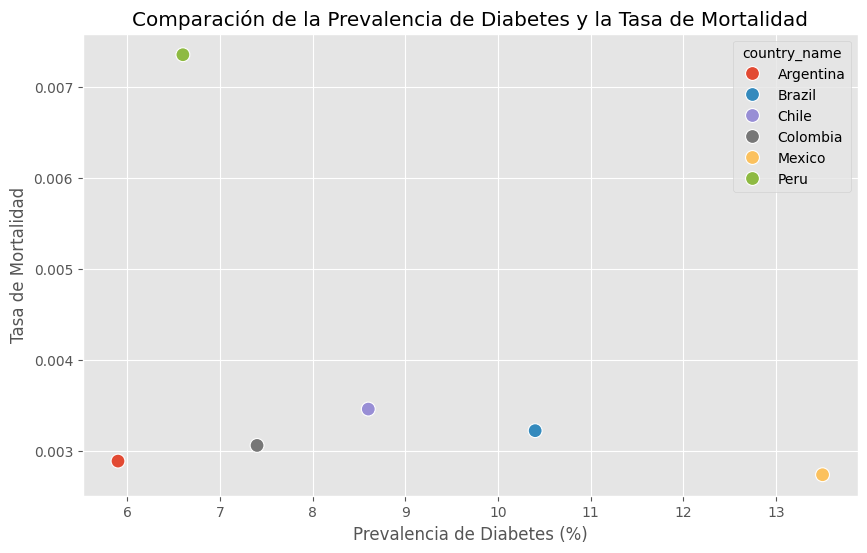

In [28]:

data_latinoamerica_nuevo['Tasa_de_Mortalidad'] = data_latinoamerica_nuevo['cumulative_deceased'] / data_latinoamerica_nuevo['population']

# Agrupar los datos por país y obtener el valor máximo de la tasa de mortalidad y la prevalencia de diabetes
data_agrupada = data_latinoamerica_nuevo.groupby('country_name').agg({
    'diabetes_prevalence': 'max',
    'Tasa_de_Mortalidad': 'max'
}).reset_index()

# Crear una figura y un eje para el gráfico con un tamaño específico
fig, ax = plt.subplots(figsize=(10, 6))

# Crear un gráfico de dispersión para comparar la prevalencia de diabetes y la tasa de mortalidad
sns.scatterplot(x='diabetes_prevalence', y='Tasa_de_Mortalidad', data=data_agrupada, hue='country_name', s=100)

# Añadir un título al gráfico
plt.title('Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad')

# Etiquetar el eje X
plt.xlabel('Prevalencia de Diabetes (%)')

# Etiquetar el eje Y
plt.ylabel('Tasa de Mortalidad')

# Mostrar el gráfico
plt.show()

### **Avance 3**: EDA con Numpy y Pandas

In [51]:
#Carga de Librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import geopandas as gpd

In [52]:
data_latinoamerica_nuevo = pd.read_csv("DatosFinalesFiltrado_Modificado.csv", sep=',', parse_dates=['date'])
data_latinoamerica_nuevo.set_index('date', inplace=True)

In [53]:
# Seleccion del estilo de graficos a utilizar
plt.style.use('ggplot')

##### Evolución de Casos Activos vs. Recuperados

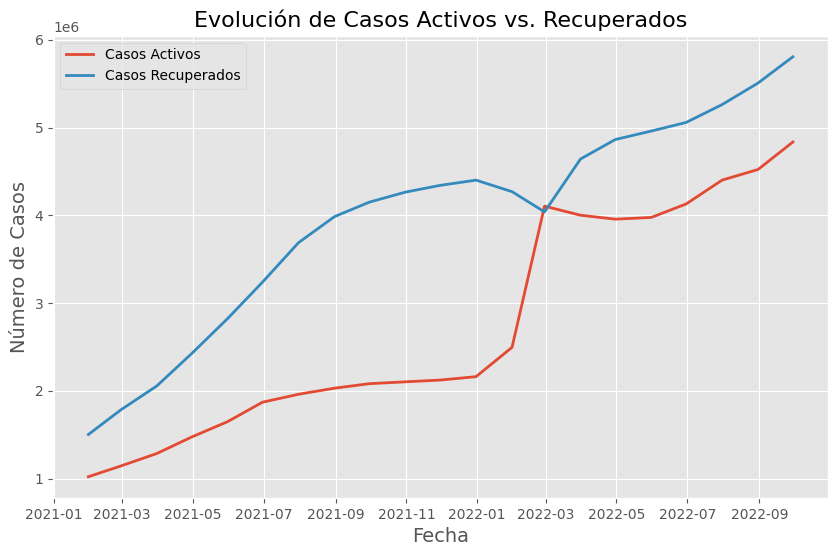

In [54]:
# Calcular los casos activos
data_latinoamerica_nuevo['active_cases'] = data_latinoamerica_nuevo['cumulative_confirmed'] - data_latinoamerica_nuevo['cumulative_recovered'] - data_latinoamerica_nuevo['cumulative_deceased']

# Resamplear los datos a una frecuencia mensual y calcular la media
datos_mensuales = data_latinoamerica_nuevo.resample('ME').mean(numeric_only=True)

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(datos_mensuales.index, datos_mensuales['active_cases'], label='Casos Activos', linewidth=2)
plt.plot(datos_mensuales.index, datos_mensuales['cumulative_recovered'], label='Casos Recuperados', linewidth=2)

# Configurar los títulos y etiquetas
plt.title('Evolución de Casos Activos vs. Recuperados', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Número de Casos', fontsize=14)
plt.legend()

# Mostrar el gráfico
plt.show()

##### Tasa de Crecimiento (%)

Para calcular la tasa de crecimiento en porcentaje, podemos usar la fórmula:

Tasa de crecimiento =  [( Valor final - Valor inicial)/ Valor inicial] × 100

Podemos aplicar esta fórmula a los casos activos y recuperados para obtener la tasa de crecimiento en porcentaje. Aquí tienes el código para crear el gráfico de la tasa de crecimiento de casos activos y recuperados:

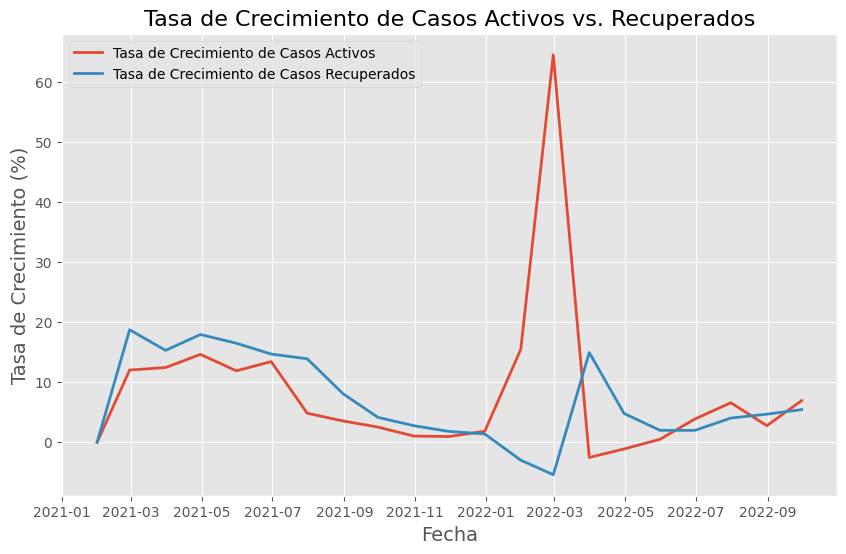

In [55]:
# Calcular la tasa de crecimiento en porcentaje
datos_mensuales['tasa_crecimiento_activos'] = ((datos_mensuales['active_cases'].diff() / datos_mensuales['active_cases'].shift()) * 100).fillna(0)
datos_mensuales['tasa_crecimiento_recuperados'] = ((datos_mensuales['cumulative_recovered'].diff() / datos_mensuales['cumulative_recovered'].shift()) * 100).fillna(0)

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(datos_mensuales.index, datos_mensuales['tasa_crecimiento_activos'], label='Tasa de Crecimiento de Casos Activos', linewidth=2)
plt.plot(datos_mensuales.index, datos_mensuales['tasa_crecimiento_recuperados'], label='Tasa de Crecimiento de Casos Recuperados', linewidth=2)

# Configurar los títulos y etiquetas
plt.title('Tasa de Crecimiento de Casos Activos vs. Recuperados', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Tasa de Crecimiento (%)', fontsize=14)
plt.legend()

# Mostrar el gráfico
plt.show()


##### Relación entre la Cobertura de Vacunación y la Reducción de Casos

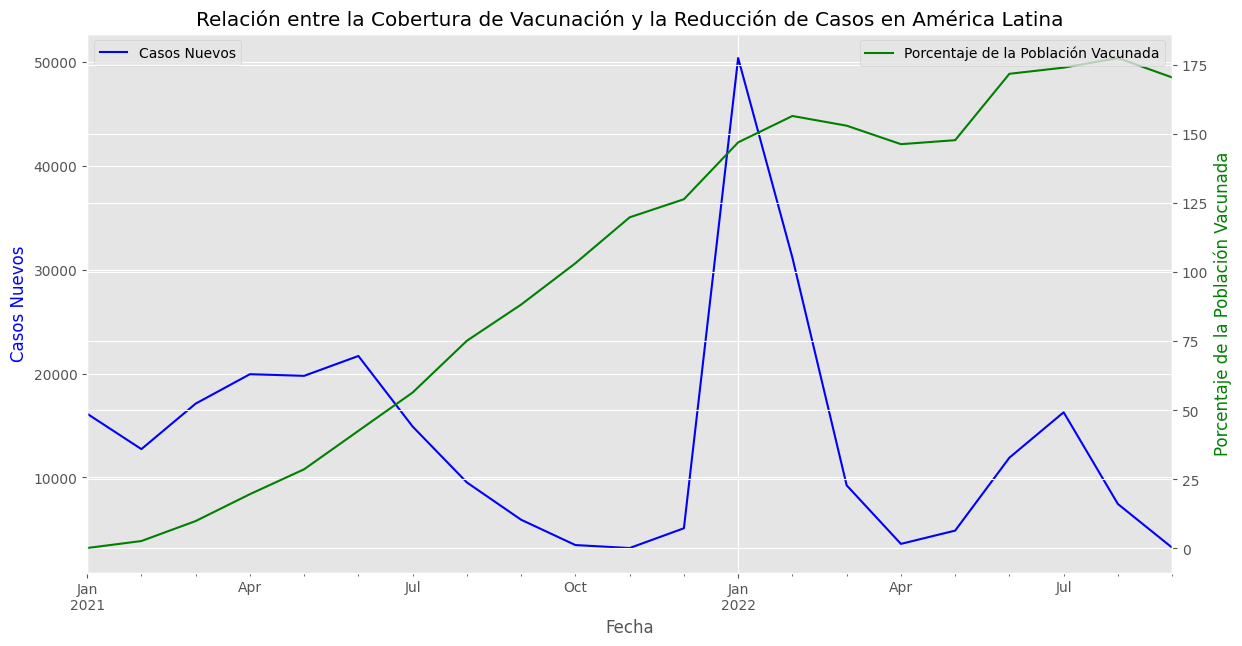

In [56]:
# Cómo evoluciona la vacunación en América Latina y la reducción de casos de COVID-19
plt.figure(figsize=(14, 7))  # Se crea una figura con un tamaño específico
ax1 = plt.gca()  # Se obtiene el eje actual (primario)
ax2 = ax1.twinx()  # Se crea un segundo eje y que comparte el mismo eje x con el primero

# Cálculo del porcentaje de la población vacunada
data_latinoamerica_nuevo['percentage_vaccinated'] = (data_latinoamerica_nuevo['cumulative_vaccine_doses_administered'] / data_latinoamerica_nuevo['population']) * 100

# Se grafican los nuevos casos de COVID-19 y el porcentaje de la población vacunada, resampleados por mes
data_latinoamerica_nuevo.resample('ME').mean(numeric_only=True)['new_confirmed'].plot(ax=ax1, color='blue', label='Casos Nuevos')
data_latinoamerica_nuevo.resample('ME').mean(numeric_only=True)['percentage_vaccinated'].plot(ax=ax2, color='green', label='Porcentaje de la Población Vacunada')

# Configuración de las etiquetas del eje x y los ejes y
ax1.set_xlabel('Fecha')  # Etiqueta del eje x
ax1.set_ylabel('Casos Nuevos', color='blue')  # Etiqueta del eje y para los nuevos casos (color azul)
ax2.set_ylabel('Porcentaje de la Población Vacunada', color='green')  # Etiqueta del eje y para el porcentaje de vacunados (color verde)

# Título del gráfico
plt.title('Relación entre la Cobertura de Vacunación y la Reducción de Casos en América Latina')

# Leyendas para cada serie de datos en los ejes
ax1.legend(loc='upper left')  # Leyenda para los nuevos casos en la esquina superior izquierda
ax2.legend(loc='upper right')  # Leyenda para el porcentaje de vacunados en la esquina superior derecha

# Mostrar el gráfico
plt.show()


##### ('País') Progreso de la vacunación por país

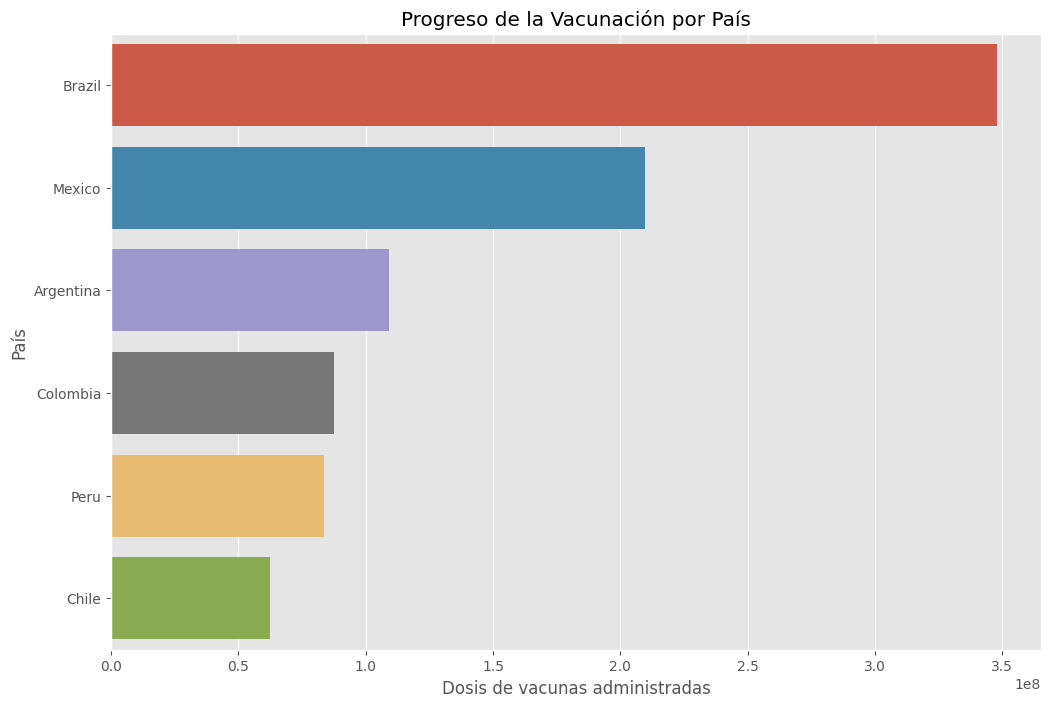

In [57]:
# Agrupar los datos por país y calcular el máximo de dosis de vacunas administradas para cada país
data_vacunacion = data_latinoamerica_nuevo.groupby('country_name')['cumulative_vaccine_doses_administered'].max().sort_values(ascending=False)

# Crear una figura para el gráfico con un tamaño específico
plt.figure(figsize=(12, 8))

# Crear un gráfico de barras horizontal utilizando Seaborn
# Los valores de las barras en el eje x son el número de dosis de vacunas administradas
# Los nombres de los países en el eje y determinan la posición de las barras
# El argumento 'hue' se utiliza para asignar colores diferentes a cada barra basada en el país
sns.barplot(x=data_vacunacion.values, y=data_vacunacion.index, hue=data_vacunacion.index)

# Añadir una etiqueta al eje x para indicar el significado de los valores
plt.xlabel('Dosis de vacunas administradas')

# Añadir una etiqueta al eje y para indicar que representa los países
plt.ylabel('País')

# Añadir un título al gráfico para describir su contenido
plt.title('Progreso de la Vacunación por País')

# Mostrar el gráfico
plt.show()


##### Nuevos casos y temperatura promedio

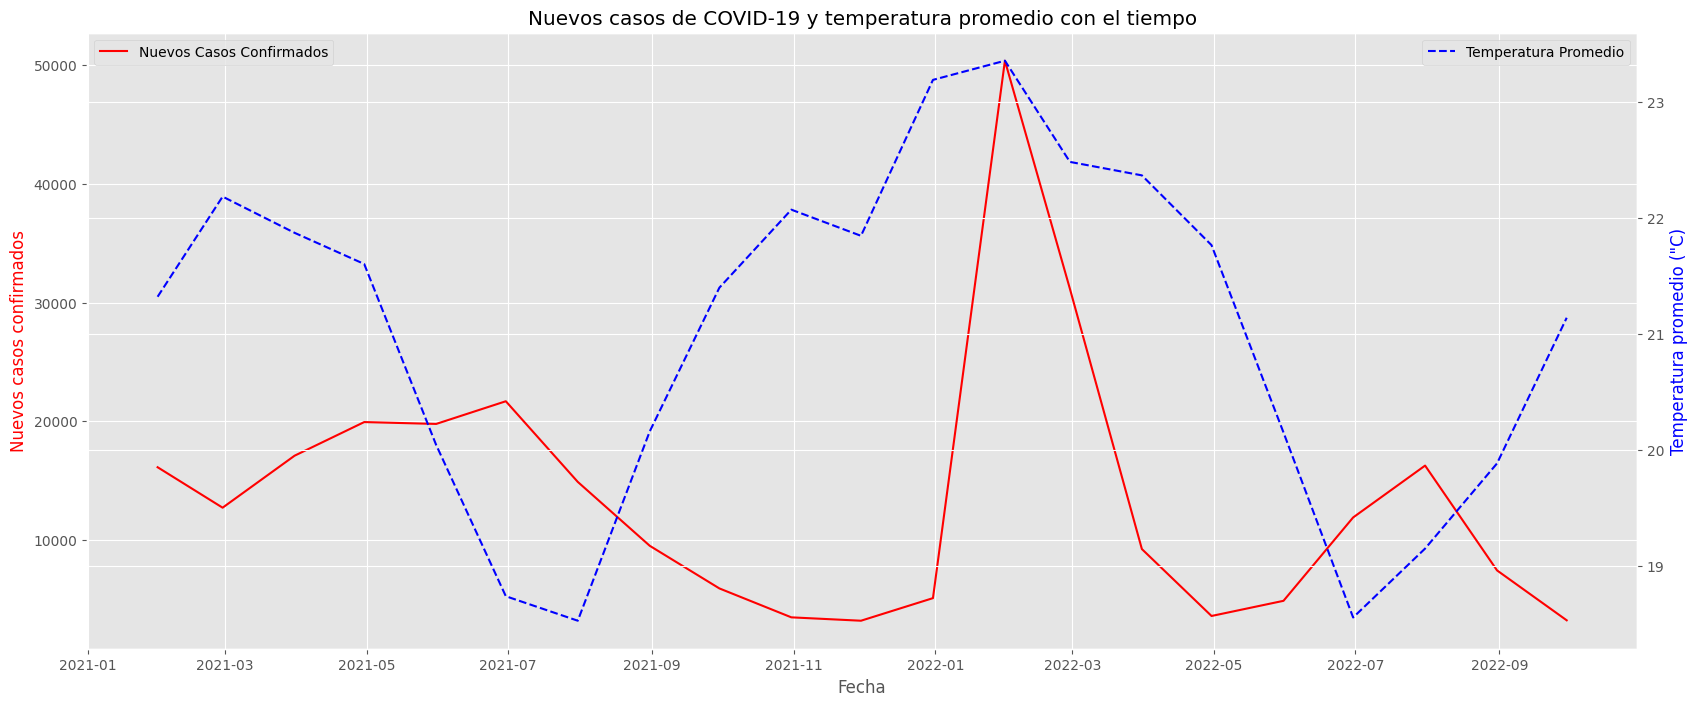

In [58]:
# Crear una nueva figura con un tamaño específico
plt.figure(figsize=(20, 8))

# Obtener los ejes actuales (ax1)
ax1 = plt.gca()

# Crear un segundo conjunto de ejes que comparten el mismo eje x que ax1
ax2 = ax1.twinx()

# Graficar los datos de nuevos casos confirmados en el conjunto de ejes ax1
ax1.plot(
    data_latinoamerica_nuevo.resample('ME').mean(numeric_only=True).index,  # Eje x: fechas
    data_latinoamerica_nuevo.resample('ME').mean(numeric_only=True)['new_confirmed'],  # Eje y: nuevos casos confirmados
    color='red',  # Color de la línea
    label='Nuevos Casos Confirmados'  # Etiqueta para la leyenda
)

# Graficar los datos de temperatura promedio en el conjunto de ejes ax2
ax2.plot(
    data_latinoamerica_nuevo.resample('ME').mean(numeric_only=True).index,  # Eje x: fechas
    data_latinoamerica_nuevo.resample('ME').mean(numeric_only=True)['average_temperature_celsius'],  # Eje y: temperatura promedio
    color='blue',  # Color de la línea
    label='Temperatura Promedio',  # Etiqueta para la leyenda
    linestyle='--'  # Estilo de línea punteada
)

# Establecer la etiqueta del eje x para el primer conjunto de ejes
ax1.set_xlabel('Fecha')

# Establecer la etiqueta del eje y para el primer conjunto de ejes (nuevos casos confirmados), con el texto en color rojo
ax1.set_ylabel('Nuevos casos confirmados', color='red')

# Establecer la etiqueta del eje y para el segundo conjunto de ejes (temperatura promedio), con el texto en color azul
ax2.set_ylabel('Temperatura promedio ("C)', color='blue')

# Establecer el título del gráfico
plt.title('Nuevos casos de COVID-19 y temperatura promedio con el tiempo')

# Mostrar la leyenda para el primer conjunto de ejes en la esquina superior izquierda
ax1.legend(loc='upper left')

# Mostrar la leyenda para el segundo conjunto de ejes en la esquina superior derecha
ax2.legend(loc='upper right')

# Mostrar el gráfico completo con ambos conjuntos de ejes y sus respectivas líneas de datos
plt.show()


##### Impacto de la Urbanización en la Propagación del Covid-19

C:\Users\m_pie\AppData\Local\Temp\ipykernel_14976\1647036389.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=casos_urbanos['urban_population_percentage'], y=casos_urbanos.index, palette=['#73B7E7', '#FF9D47', '#7FDC7F', '#DF5353', '#9467bd', '#A8B4A5'])


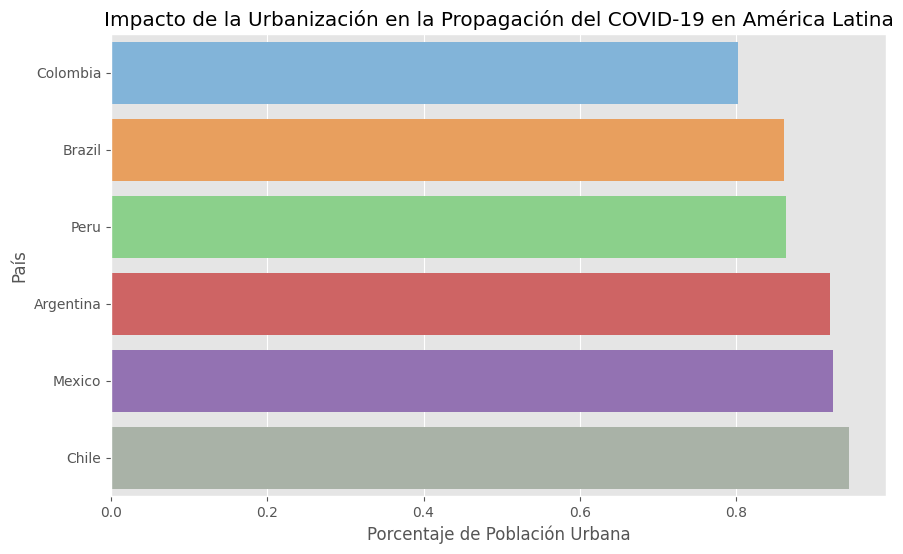

In [59]:
# Calcula el porcentaje de población urbana para cada país
data_latinoamerica_nuevo['urban_population_percentage'] = data_latinoamerica_nuevo['population_urban'] / data_latinoamerica_nuevo['population']

# Agrupa los datos por país y selecciona el último registro de cada país, que contiene los datos más recientes
casos_urbanos = data_latinoamerica_nuevo.groupby('country_name').last().sort_values(by='urban_population_percentage')

# Crea una figura para el gráfico con un tamaño específico
plt.figure(figsize=(10, 6))

# Crea un gráfico de barras utilizando Seaborn, donde x representa el porcentaje de población urbana y y representa el país
sns.barplot(x=casos_urbanos['urban_population_percentage'], y=casos_urbanos.index, palette=['#73B7E7', '#FF9D47', '#7FDC7F', '#DF5353', '#9467bd', '#A8B4A5'])

# Etiqueta del eje x
plt.xlabel('Porcentaje de Población Urbana')

# Etiqueta del eje y
plt.ylabel('País')

# Título del gráfico
plt.title('Impacto de la Urbanización en la Propagación del COVID-19 en América Latina')

# Muestra el gráfico
plt.show()

##### Evolución Semanal de Casos Nuevos

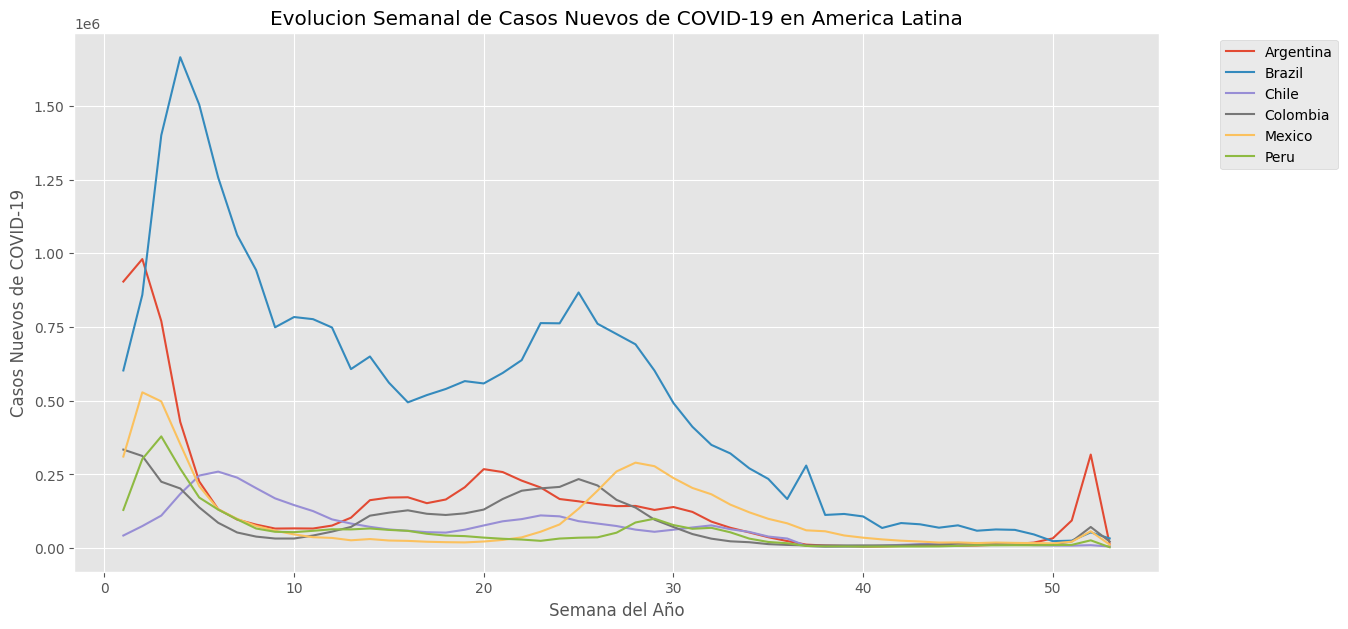

In [60]:
#Evolucion de casos de COVID-19 en America Latina a lo largo del tiempo por semana

data_latinoamerica_nuevo['week'] = data_latinoamerica_nuevo.index.isocalendar().week
data_latinoamerica_nuevo['year'] = data_latinoamerica_nuevo.index.isocalendar().year
casos_semanales = data_latinoamerica_nuevo.groupby(['country_name', 'week']) ['new_confirmed'].sum().reset_index()

plt.figure(figsize=(14, 7))

for country in casos_semanales['country_name'].unique():
    casos_semanales_por_pais = casos_semanales[casos_semanales['country_name'] == country]
    plt.plot(casos_semanales_por_pais['week'], casos_semanales_por_pais['new_confirmed'], label=country)

plt.xlabel('Semana del Año')
plt.ylabel('Casos Nuevos de COVID-19')
plt.title('Evolucion Semanal de Casos Nuevos de COVID-19 en America Latina')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

##### Evolución Anual de Casos Nuevos

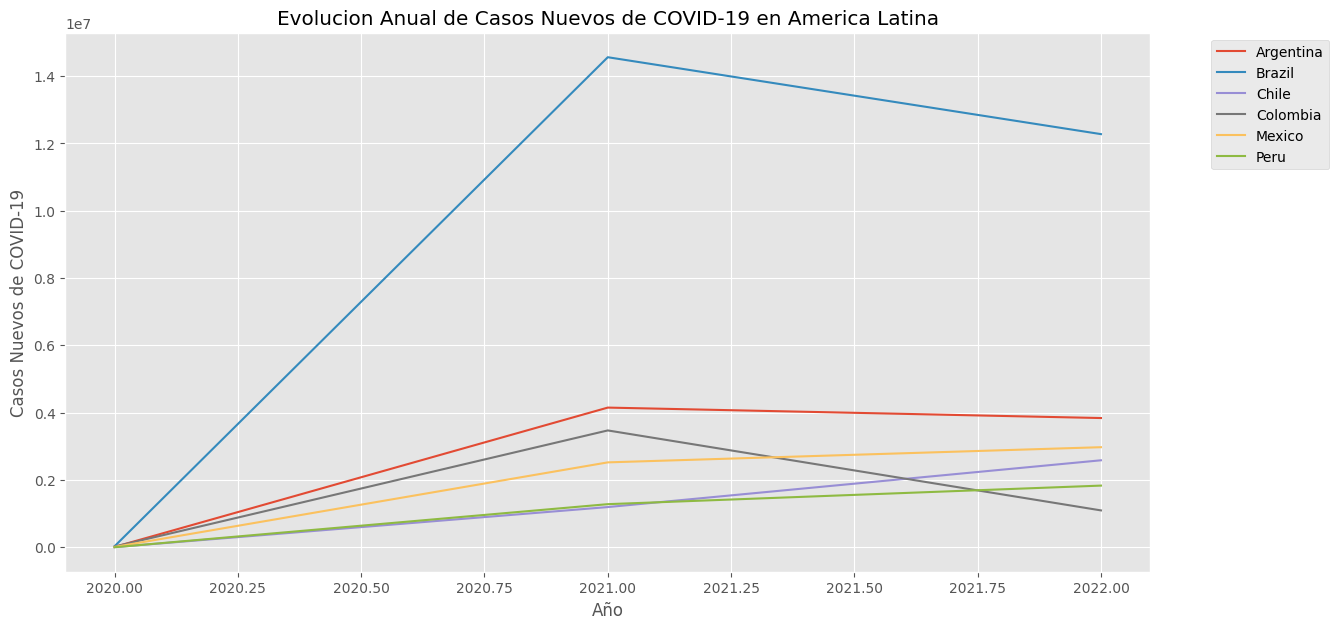

In [61]:
# Añadir columnas 'year' usando el índice de fecha
data_latinoamerica_nuevo['year'] = data_latinoamerica_nuevo.index.isocalendar().year

# Agrupar los datos por 'country_name' y 'year' y sumar los casos nuevos confirmados para cada semana
casos_anuales = data_latinoamerica_nuevo.groupby(['country_name', 'year']) ['new_confirmed']. sum().reset_index()

plt.figure(figsize=(14, 7))
for country in casos_anuales['country_name'].unique():      # Iterar sobre cada país único en el conjunto de datos agrupados
    casos_anuales_por_pais = casos_anuales [casos_anuales['country_name'] == country]       # Filtrar los datos para el país actual
    plt.plot(casos_anuales_por_pais['year'], casos_anuales_por_pais['new_confirmed'], label=country)    # Graficar los casos nuevos confirmados por año por pais

plt.ylabel('Casos Nuevos de COVID-19')  #añadir titulo eje y
plt.xlabel('Año')   #añadir titulo eje x
plt.title('Evolucion Anual de Casos Nuevos de COVID-19 en America Latina')  #agregar titulo al grafico
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')       # Añadir la leyenda fuera del gráfico, a la derecha
plt.show()      #imprimir el grafico

##### Distribución de la Población por Edad en Países

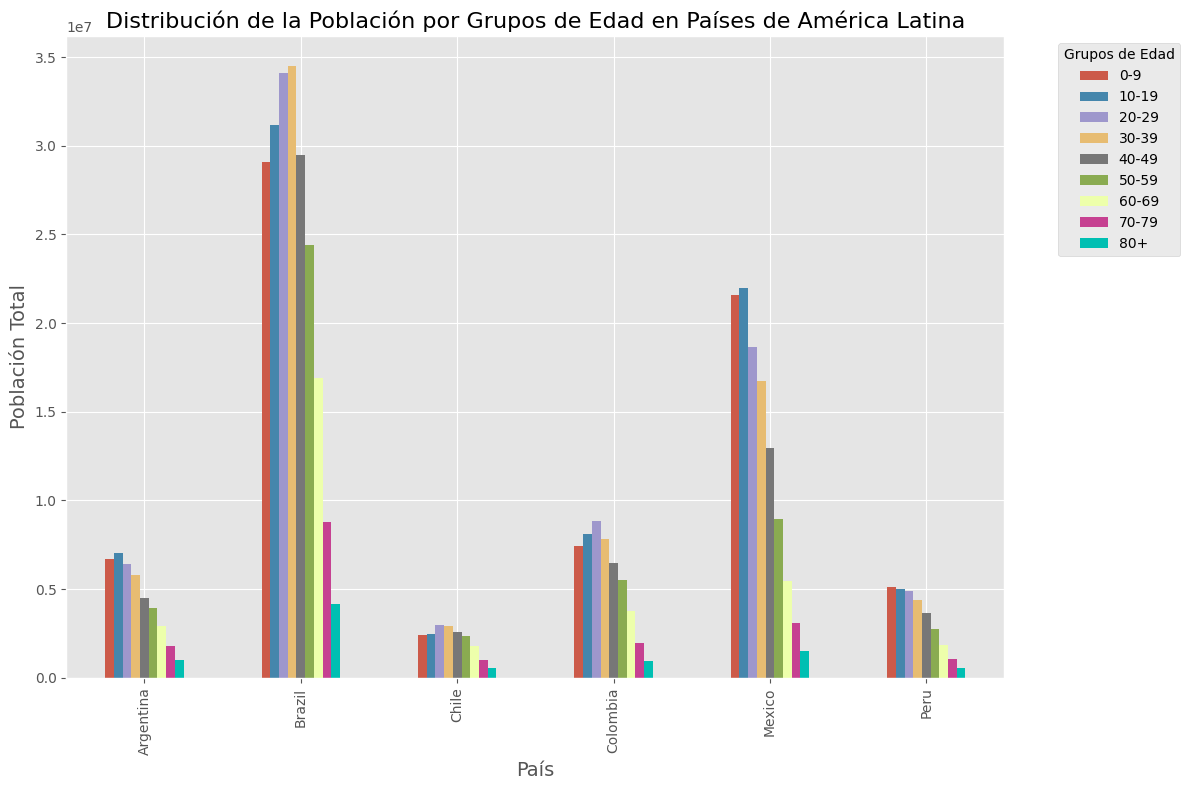

In [62]:
# Definir los grupos de edad
grupos_edad = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39',
               'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79',
               'population_age_80_and_older']

# Agrupar los datos por país y sumar la población en cada grupo de edad
age_distribution= data_latinoamerica_nuevo.groupby('country_name')[grupos_edad].mean()

# Crear el gráfico de barras apiladas
age_distribution.plot(kind='bar', stacked=False, figsize=(12, 8),
                             color=['#CC5A49', '#4586AC', '#9E97CC', '#E7BC72', '#777777', '#8AAB51', '#EDFFAB','#C64191', '#00BFB2' ])

# Configurar los títulos y etiquetas
plt.title('Distribución de la Población por Grupos de Edad en Países de América Latina', fontsize=16)
plt.xlabel('País', fontsize=14)
plt.ylabel('Población Total', fontsize=14)

# Añadir una leyenda personalizada para los grupos de edad
plt.legend(title='Grupos de Edad', bbox_to_anchor=(1.05, 1), loc='upper left',
           labels=['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+'])

# Mostrar el gráfico
plt.tight_layout()
plt.show()


##### Comparación de Estrategias de Vacunación en América Latina

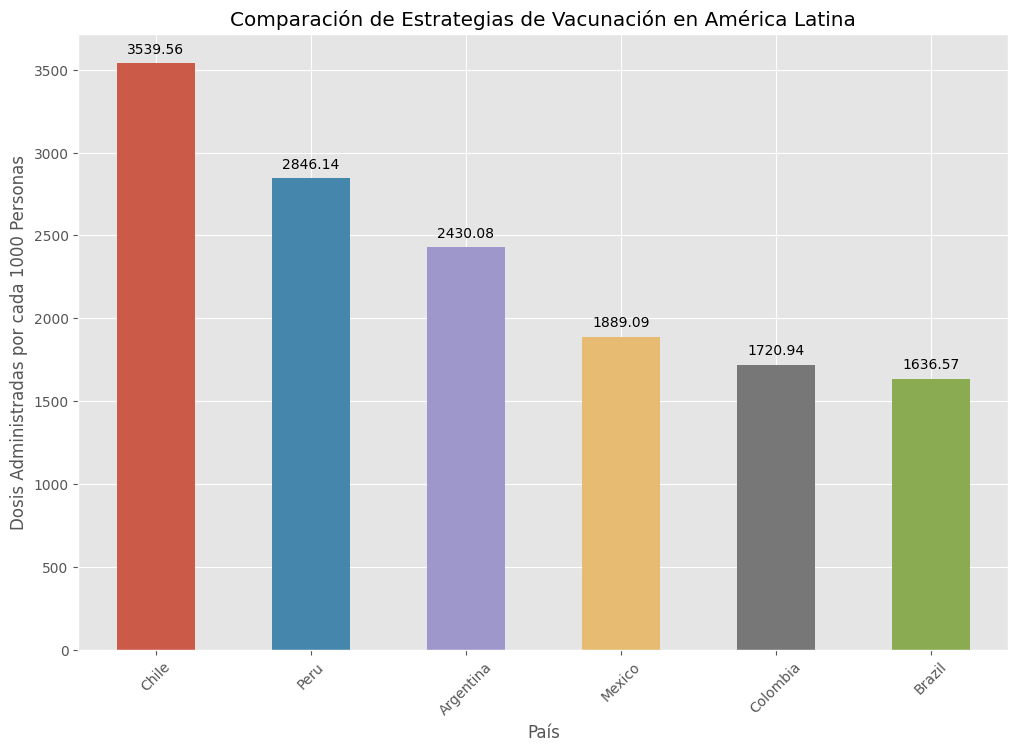

In [63]:
# Calcula el porcentaje de dosis de vacunas administradas por cada 1000 personas en cada país
vaccination_strategy = data_latinoamerica_nuevo.groupby('country_name')['cumulative_vaccine_doses_administered'].max() / data_latinoamerica_nuevo.groupby('country_name')['population'].max() * 1000

# Ordena los países de forma descendente según el porcentaje de dosis administradas por cada 100 personas
vaccination_strategy_sorted = vaccination_strategy.sort_values(ascending=False)

# Crea un gráfico de barras con el porcentaje de dosis administradas por cada 100 personas para cada país
ax = vaccination_strategy_sorted.plot(kind='bar', figsize=(12, 8), color=['#CC5A49', '#4586AC', '#9E97CC', '#E7BC72', '#777777', '#8AAB51'])

# Etiqueta del eje x
plt.xlabel('País')

# Etiqueta del eje y
plt.ylabel('Dosis Administradas por cada 1000 Personas')

# Rotación de etiquetas
plt.xticks(rotation=45)

# Título del gráfico
plt.title('Comparación de Estrategias de Vacunación en América Latina')

# Agregar la tasa de dosis administradas encima de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Muestra el gráfico de barras
plt.show()

##### Evolución del Número de Muertes Diarias.

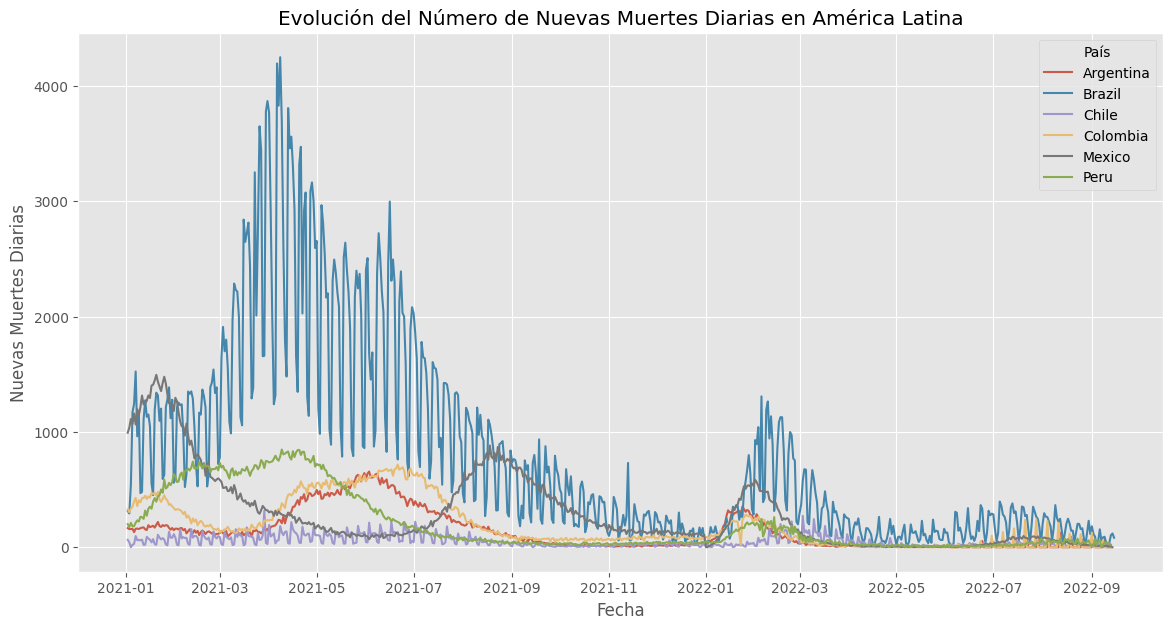

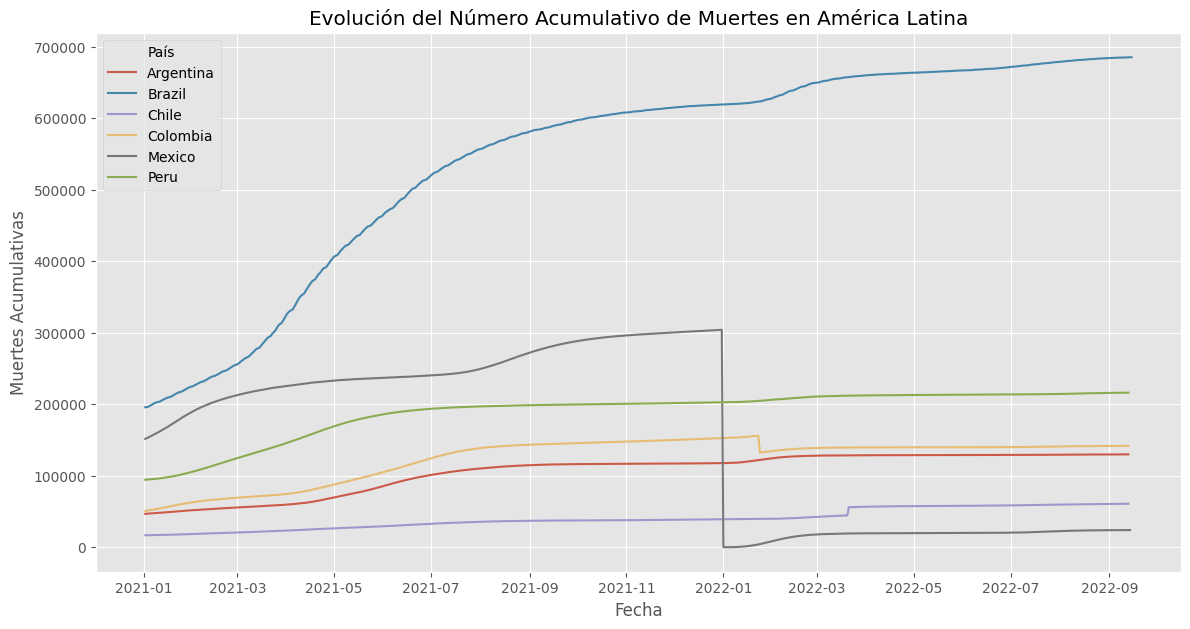

In [64]:
# Crear un gráfico de línea para la evolución del número de nuevas muertes diarias en los países de América Latina
plt.figure(figsize=(14, 7))  # Configura el tamaño de la figura del gráfico
sns.lineplot(
    data=data_latinoamerica_nuevo,  # Especifica el DataFrame a utilizar
    x='date',  # Especifica la columna para el eje X
    y='new_deceased',  # Especifica la columna para el eje Y
    hue='country_name',  # Diferencia las líneas por país
    palette=['#CC5A49', '#4586AC', '#9E97CC', '#E7BC72', '#777777', '#8AAB51']  # Especifica la paleta de colores a usar
)


# Configurar los ejes y el título del gráfico
plt.xlabel('Fecha')  # Etiqueta para el eje X
plt.ylabel('Nuevas Muertes Diarias')  # Etiqueta para el eje Y
plt.title('Evolución del Número de Nuevas Muertes Diarias en América Latina')  # Título del gráfico
plt.legend(title='País')  # Título de la leyenda


# Mostrar el gráfico
plt.show()  # Muestra el gráfico en pantalla


# Crear un gráfico de línea para la evolución del número acumulativo de muertes en los países de América Latina
plt.figure(figsize=(14, 7))  # Configura el tamaño de la figura del gráfico
sns.lineplot(
    data=data_latinoamerica_nuevo,  # Especifica el DataFrame a utilizar
    x='date',  # Especifica la columna para el eje X
    y='cumulative_deceased',  # Especifica la columna para el eje Y
    hue='country_name',  # Diferencia las líneas por país
    palette=['#CC5A49', '#4586AC', '#9E97CC', '#E7BC72', '#777777', '#8AAB51']  # Especifica la paleta de colores a usar
)


# Configurar los ejes y el título del gráfico
plt.xlabel('Fecha')  # Etiqueta para el eje X
plt.ylabel('Muertes Acumulativas')  # Etiqueta para el eje Y
plt.title('Evolución del Número Acumulativo de Muertes en América Latina')  # Título del gráfico
plt.legend(title='País')  # Título de la leyenda


# Mostrar el gráfico
plt.show()  # Muestra el gráfico en pantalla


##### Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad

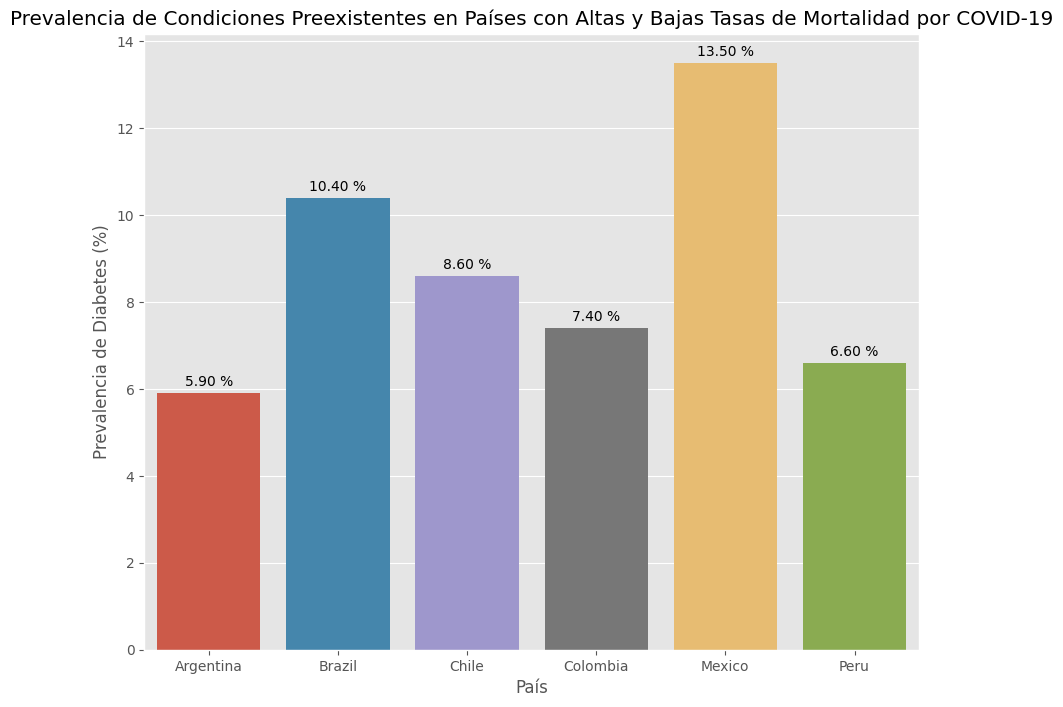

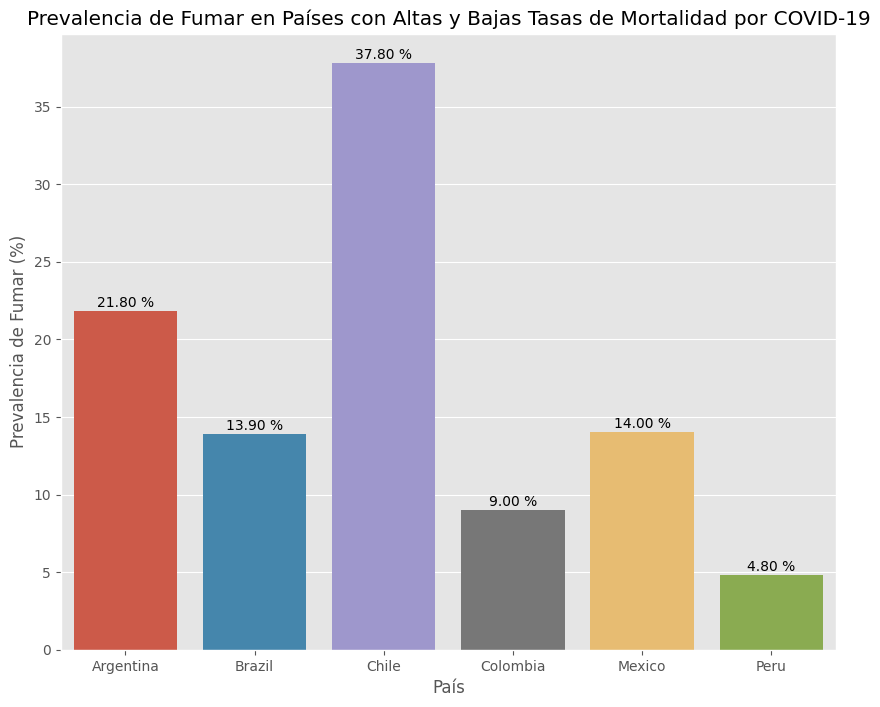

In [73]:
# Obtener los países con las mayores y menores tasas de mortalidad acumulada
top_countries = data_latinoamerica_nuevo.groupby('country_name')['cumulative_deceased'].max().nlargest(5).index
bottom_countries = data_latinoamerica_nuevo.groupby('country_name')['cumulative_deceased'].max().nsmallest(5).index

# Filtrar los datos para incluir solo los países en las listas de mayores y menores tasas de mortalidad
conditions_data = data_latinoamerica_nuevo[data_latinoamerica_nuevo['country_name'].isin(top_countries.union(bottom_countries))]

# Prevalencia de diabetes
plt.figure(figsize=(10, 8))  # Configurar el tamaño de la figura para el gráfico
ax = sns.barplot(data=conditions_data, x='country_name', y='diabetes_prevalence', hue='country_name')

# Etiqueta para el eje X
plt.xlabel('País')

# Etiqueta para el eje Y
plt.ylabel('Prevalencia de Diabetes (%)')

# Título del gráfico
plt.title('Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad por COVID-19')

# Agregar el valor de prevalencia de diabetes encima de cada barra
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, f'{height:.2f} %', ha='center', va='bottom')

# Mostrar el gráfico
plt.show()

# Prevalencia de fumar
plt.figure(figsize=(10, 8))  # Configurar el tamaño de la figura para el gráfico
ax = sns.barplot(data=conditions_data, x='country_name', y='smoking_prevalence', hue='country_name')

# Etiqueta para el eje X
plt.xlabel('País')

# Etiqueta para el eje Y
plt.ylabel('Prevalencia de Fumar (%)')

# Título del gráfico
plt.title('Prevalencia de Fumar en Países con Altas y Bajas Tasas de Mortalidad por COVID-19')

# Agregar el valor de prevalencia de fumar encima de cada barra
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, f'{height:.2f} %', ha='center', va='bottom')

# Mostrar el gráfico
plt.show()

##### Análisis Temporal de la Mortalidad

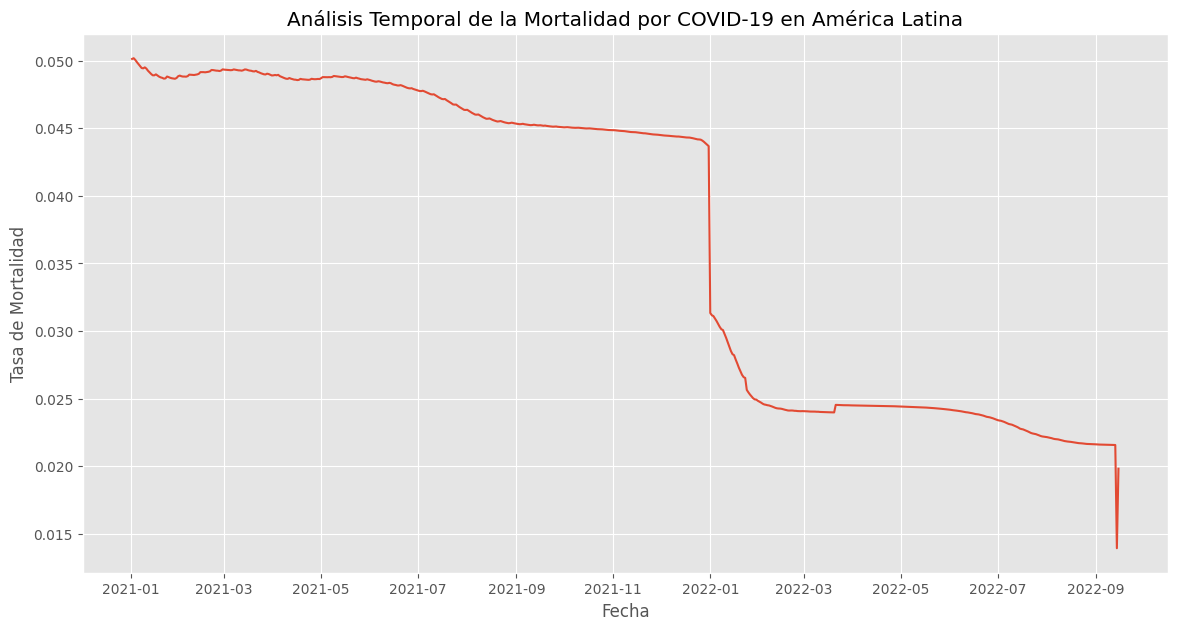

In [66]:
# Cálculo de la tasa de mortalidad como el cociente entre el número acumulado de fallecidos y el número acumulado de confirmados de COVID-19
data_latinoamerica_nuevo['mortality_rate'] = data_latinoamerica_nuevo['cumulative_deceased'] / data_latinoamerica_nuevo['cumulative_confirmed']

# Creación de una figura para el gráfico con un tamaño específico
plt.figure(figsize=(14, 7))

# Gráfico de línea que muestra el análisis temporal de la tasa de mortalidad por COVID-19 en América Latina
# Se utiliza Seaborn para generar el gráfico, con la fecha en el eje x y la tasa de mortalidad en el eje y,
# utilizando el valor medio como estimador y sin intervalo de confianza (ci=None)
sns.lineplot(data=data_latinoamerica_nuevo, x='date', y='mortality_rate', estimator='mean', errorbar=None)

# Título del gráfico
plt.title('Análisis Temporal de la Mortalidad por COVID-19 en América Latina')

# Etiqueta del eje x
plt.xlabel('Fecha')

# Etiqueta del eje y
plt.ylabel('Tasa de Mortalidad')

# Mostrar el gráfico
plt.show()


Este código calcula la tasa de mortalidad por COVID-19 en América Latina como el cociente entre el número acumulado de fallecidos y el número acumulado de confirmados de casos de COVID-19. Luego, genera un gráfico de línea que muestra la evolución temporal de esta tasa de mortalidad a lo largo del tiempo. La librería Seaborn se utiliza para visualizar el gráfico, con la fecha en el eje x y la tasa de mortalidad en el eje y, utilizando el valor medio como estimador y sin mostrar intervalos de confianza.

##### Comparación de la Situación Actual (Contexto de los datos)

<Figure size 600x400 with 0 Axes>

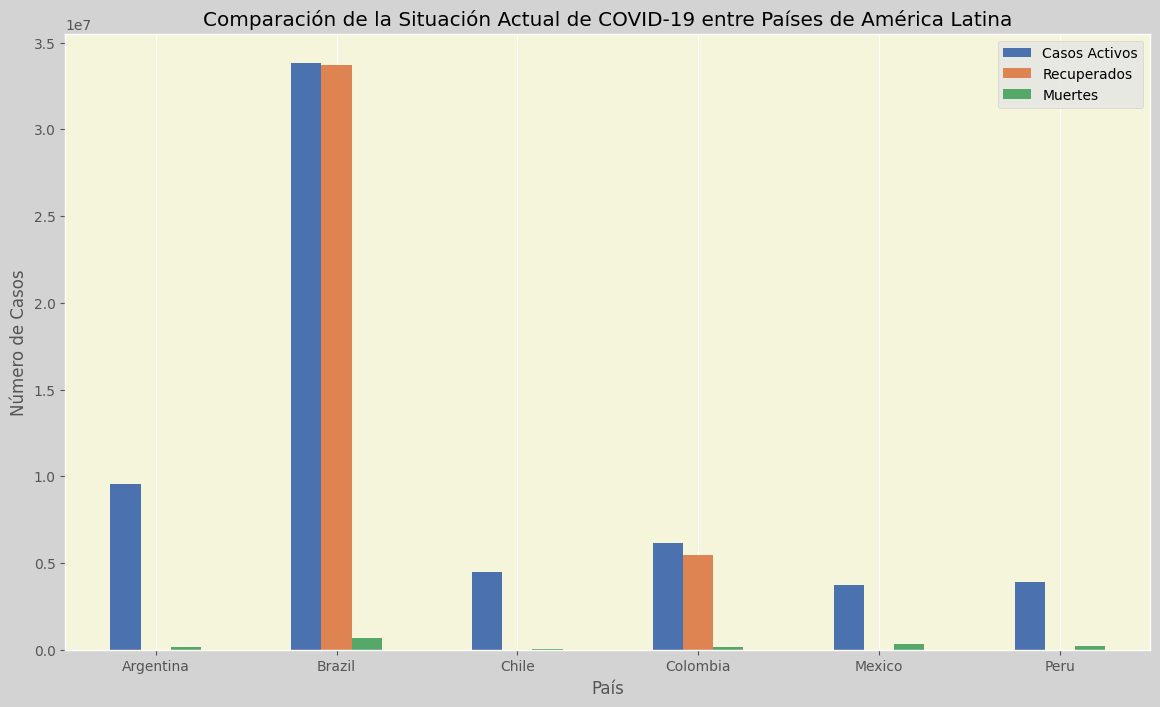

In [67]:
# No hay datos de recuperados y muertes en algunos países

# Agrupa los datos por nombre del país y obtiene el valor máximo para 'active_cases', 'cumulative_recovered' y 'cumulative_deceased'
situacion_actual = data_latinoamerica_nuevo.groupby('country_name').max()[['active_cases', 'cumulative_recovered', 'cumulative_deceased']]

# Crea el gráfico de barras
plt.figure(figsize=(6, 4))  # Configura el tamaño de la figura del gráfico
situacion_actual.plot(kind='bar', stacked=False, figsize=(14, 8), color=('#4C71AF', '#DD8452', '#55A868'))  # Grafica los datos en un gráfico de barras no apiladas

# Configura el título y etiquetas del gráfico
plt.title('Comparación de la Situación Actual de COVID-19 entre Países de América Latina')  # Título del gráfico
plt.xlabel('País')  # Etiqueta del eje X
plt.ylabel('Número de Casos')  # Etiqueta del eje Y
plt.legend(['Casos Activos', 'Recuperados', 'Muertes'])  # Leyenda para cada barra
plt.gca().set_facecolor('beige')  # Color de fondo del área del gráfico
plt.gcf().set_facecolor('lightgray')  # Establece el fondo alrededor del gráfico
plt.grid(axis='y')  # Agregar líneas solo en el eje y
plt.xticks(rotation=0)
plt.show()  # Muestra el gráfico en pantalla

##### Variación Mensual de Casos y Muertes

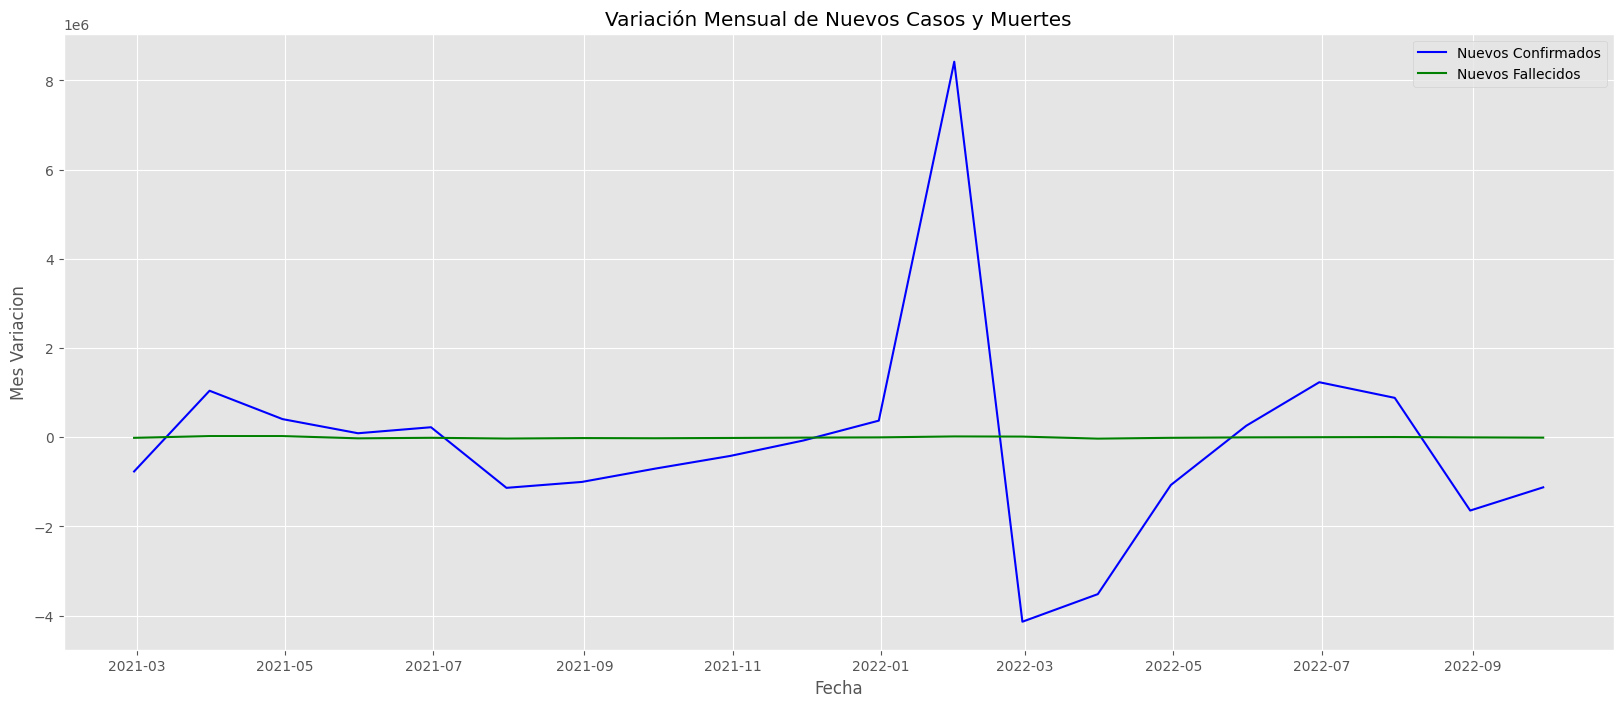

In [77]:
# Hacer un resampleo para calcular la suma mensual de nuevos casos confirmados y nuevas muertes

nuevos_casos_por_mes = data_latinoamerica_nuevo['new_confirmed'].resample('ME').sum()
nuevos_fallecidos_por_mes = data_latinoamerica_nuevo['new_deceased'].resample('ME').sum()

#calcula la variación mensual restando la suma del mes anterior a la suma del mes actual
variacion_nuevos_casos = nuevos_casos_por_mes.diff()
variacion_nuevos_fallecidos = nuevos_fallecidos_por_mes.diff()

# crear el grafico 

plt.figure(figsize=(20, 8))
sns.lineplot(x=variacion_nuevos_casos.index, y=variacion_nuevos_casos.values, label='Nuevos Confirmados', color='blue')
sns.lineplot(x=variacion_nuevos_fallecidos.index, y=variacion_nuevos_fallecidos.values, label='Nuevos Fallecidos', color='green')

# personalizar el grafico 

plt.xlabel('Fecha')
plt.ylabel('Mes Variacion')
plt.title('Variación Mensual de Nuevos Casos y Muertes')


plt.legend()
plt.show()


##### Tasa de Mortalidad por país (extra)

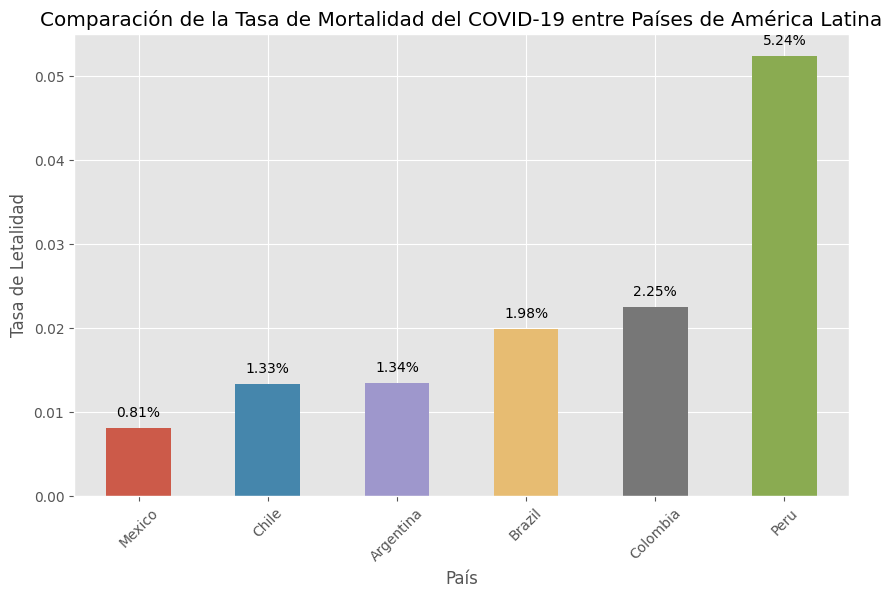

In [69]:
# Calcula la tasa de letalidad por país
data_latinoamerica_nuevo['case_fatality_rate'] = data_latinoamerica_nuevo['cumulative_deceased'] / data_latinoamerica_nuevo['cumulative_confirmed']

# Agrupa los datos por país y obtiene la última tasa de letalidad registrada para cada país, luego ordena estos valores
fatality_rates = data_latinoamerica_nuevo.groupby('country_name')['case_fatality_rate'].last().sort_values()

# Crear la figura del gráfico
plt.figure(figsize=(10, 6))  # Configura el tamaño de la figura para el gráfico

# Crear el gráfico de barras utilizando la paleta de colores
bars = fatality_rates.plot(kind='bar', color=['#CC5A49', '#4586AC', '#9E97CC', '#E7BC72', '#777777', '#8AAB51'])

# Configurar los ejes y el título del gráfico
plt.xlabel('País')  # Etiqueta para el eje X
plt.ylabel('Tasa de Letalidad')  # Etiqueta para el eje Y
plt.xticks(rotation=45)
plt.title('Comparación de la Tasa de Mortalidad del COVID-19 entre Países de América Latina')  # Título del gráfico

# Agregar el valor de la tasa de letalidad encima de cada barra
for p in bars.patches:
    height = p.get_height()
    bars.text(p.get_x() + p.get_width() / 2., height + 0.001, f'{height:.2%}', ha='center', va='bottom')

# Mostrar el gráfico
plt.show()  # Muestra el gráfico en pantalla

##### 5. Investiga posibles correlaciones entre las distintas características

In [70]:
import folium
from folium.plugins import HeatMap

# Seleccionamos las columnas que vamos a utilizar
columns = ['latitude', 'longitude', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_vaccine_doses_administered', 'cumulative_recovered']
data_map = data_latinoamerica_nuevo[columns].dropna()  #Elimina las filas que contienen valores faltantes, en cualquier columna del dataframe

# Creamos un mapa centrado en América Latina
mapa = folium.Map(location=[-14.235004, -51.92528], zoom_start=3)

# Creamos una función para agregar mapas de calor con capas de control
def add_heatmap(data, value_column, name, map_object):
    heat_data = data[['latitude', 'longitude', value_column]].dropna().values
    heat_map = HeatMap(data=heat_data, radius=15)
    heat_layer = folium.FeatureGroup(name=name)
    heat_layer.add_child(heat_map)
    map_object.add_child(heat_layer)

# Añadimos los mapas de calor al mapa principal con capas de control
add_heatmap(data_map, 'cumulative_confirmed', 'Casos Confirmados', mapa)
add_heatmap(data_map, 'cumulative_deceased', 'Muertes', mapa)
add_heatmap(data_map, 'cumulative_vaccine_doses_administered', 'Vacunas Administradas', mapa)
add_heatmap(data_map, 'cumulative_recovered', 'Recuperados', mapa)

# Añadimos la capa de control para activar/desactivar los mapas de calor
folium.LayerControl().add_to(mapa)

# Guardamos el mapa en un archivo HTML
mapa.save('mapa.html')

# Si estás en un Jupyter Notebook, puedes visualizar el mapa directamente:
mapa

In [71]:
world = gpd. read_file(gpd.datasets.get_path('naturalearth_lowres'))
world

C:\Users\m_pie\AppData\Local\Temp\ipykernel_14976\1484611064.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd. read_file(gpd.datasets.get_path('naturalearth_lowres'))


pop_est      continent                      name iso_a3  gdp_md_est  \
0       889953.0        Oceania                      Fiji    FJI        5496   
1     58005463.0         Africa                  Tanzania    TZA       63177   
2       603253.0         Africa                 W. Sahara    ESH         907   
3     37589262.0  North America                    Canada    CAN     1736425   
4    328239523.0  North America  United States of America    USA    21433226   
..           ...            ...                       ...    ...         ...   
172    6944975.0         Europe                    Serbia    SRB       51475   
173     622137.0         Europe                Montenegro    MNE        5542   
174    1794248.0         Europe                    Kosovo    -99        7926   
175    1394973.0  North America       Trinidad and Tobago    TTO       24269   
176   11062113.0         Africa                  S. Sudan    SSD       11998   

                                              geometry  
0    MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2    POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3    MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4    MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  
..                                                 ...  
172  POLYGON ((18.82982 45.90887, 18.82984 45.90888...  
173  POLYGON ((20.07070 42.58863, 19.80161 42.50009...  
174  POLYGON ((20.59025 41.85541, 20.52295 42.21787...  
175  POLYGON ((-61.68000 10.76000, -61.10500 10.890...  
176  POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...  

[177 rows x 6 columns]

C:\Users\m_pie\AppData\Local\Temp\ipykernel_14976\3850936720.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


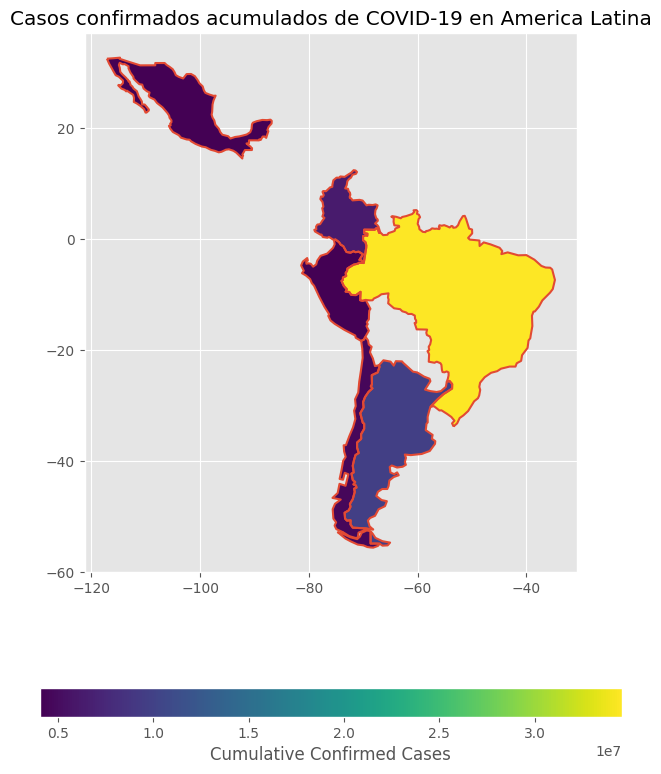

In [72]:
# mapa para ver la distribución de casos confirmados en latinoamerica por pais

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world.pop_est>0) & (world.name != "Antarctica")]
world = world[(world.name == "Argentina") | (world.name == "Chile") | (world.name == "Colombia") | (world.name == "Mexico") | (world.name == "Peru") | (world.name == "Brazil")]
world = world. rename(columns={"name":"country_name"})
world = world.merge(data_latinoamerica_nuevo.groupby('country_name') ['cumulative_confirmed'].max().reset_index(), on="country_name")
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world. boundary.plot(ax=ax)
world.plot(column='cumulative_confirmed', ax=ax, legend=True, legend_kwds={'label': "Cumulative Confirmed Cases", 'orientation': "horizontal", 'shrink': 0.5 })
plt.title('Casos confirmados acumulados de COVID-19 en America Latina')
plt.show()